# Import Libraries

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [275]:
df = pd.read_csv("/KeepaExport_Finall_CSV.csv")

In [276]:
df.shape

(568, 66)

In [277]:
# Separate the last 30 rows
control = df[-30:]

# Update the original DataFrame by excluding the last 30 rows
df = df[:-30]

# Save the dropped part to a new CSV file
control.to_csv('control.csv', index=False)

In [278]:
df1 = df.copy()

In [279]:
df.shape

(538, 66)

In [280]:
df.head(5)

Unnamed: 0                                              Title  \
0           0  Bioblas Knoblauch Sparset l Schwarzer Knoblauc...   
1           1  Knoblauch Shampoo 500 ml Bioblas, Geruchlos, A...   
2           2     CAYKUR - Turkish black tea - 500g - FILIZ LUKS   
3           3  10x AG7 (LR57, LR927, 395) 1,5V - Poundmax Alk...   
4           4  PoundMax Alkaline-Sicherheitsbatterien, 23AE/A...   

                 Description & Features: Description  Sales Rank: Current  \
0  Beschreibung\n\nDermatologisch getestet und na...            19439.000   
1                                                NaN             1474.000   
2  Beschreibung\n\nçaykur Tea ist die größte Teeg...            13289.000   
3  Beschreibung\n\nDie Poundmax Alkaline Knopfzel...             4842.000   
4  Beschreibung\n\nPoundMax Alkaline-Sicherheitsb...            17436.000   

   Sales Rank: 30 days avg.  Sales Rank: 90 days avg.  \
0                 37876.000                 38432.000   
1                  1519.000                  1415.000   
2                 11576.000                 12289.000   
3                  5135.000                  5063.000   
4                 25223.000                 21865.000   

   Sales Rank: 30 days drop %  Sales Rank: 90 days drop %  Sales Rank: Lowest  \
0                          49                          49           12281.000   
1                           3                          -4             695.000   
2                         -15                          -8            4184.000   
3                           6                           4            1962.000   
4                          31                          20            1420.000   

   Sales Rank: Highest    Sales Rank: Reference  Reviews: Rating  \
0            97751.000                 Kosmetik            4.800   
1            75454.000                 Kosmetik            4.400   
2           103081.000  Lebensmittel & Getränke            4.300   
3            98432.000        Elektronik & Foto            4.500   
4           355250.000        Elektronik & Foto            4.500   

   Reviews: Review Count  Reviews: Review Count - 30 days avg.  \
0                 26.000                                24.000   
1                939.000                               924.000   
2                 56.000                                53.000   
3                364.000                               350.000   
4                451.000                               446.000   

   Reviews: Review Count - 90 days avg.    Last Price Change  \
0                                22.000  2024-05-31 14:56:00   
1                               894.000  2024-05-30 18:40:00   
2                                47.000  2024-05-31 15:48:00   
3                               320.000  2024-03-22 17:48:00   
4                               438.000  2024-05-08 11:36:00   

   Buy Box 🚚: Current  Buy Box 🚚: 30 days avg.  Buy Box 🚚: 90 days avg.  \
0              19.980                   20.190                   20.010   
1               8.490                    8.490                    7.820   
2               9.390                    8.150                    8.310   
3               3.490                    3.490                    3.490   
4               3.490                    3.490                    3.750   

   Buy Box 🚚: 30 days drop %  Buy Box 🚚: 90 days drop %  Buy Box 🚚: Lowest  \
0                          1                          0             17.500   
1                          0                         -9              6.990   
2                        -15                        -13              7.450   
3                          0                          0              2.390   
4                          0                          7              3.290   

   Buy Box 🚚: Stock Buy Box 🚚: 90 days OOS %              Buy Box Seller  \
0                40                        0  3rd Party (A2IW2O6MMQE2OX)   
1                12                   

In [281]:
df["Buy Box Seller"].value_counts()

Buy Box Seller
Unknown                       181
3rd Party (A2IW2O6MMQE2OX)    116
Amazon                         33
3rd Party (A1QJH08OLT4GPH)     17
3rd Party (Unknown)            14
3rd Party (ASS9USB8A39TM)      12
3rd Party (A11Z78RUZ1STRM)     11
3rd Party (A21EQ8NCFSF23L)      8
3rd Party (A19LYSV8FD2JUH)      8
3rd Party (A140VYN31BD2UW)      8
3rd Party (A12GWVV5E7WLVW)      8
3rd Party (A1TIFKZZNZTSVM)      7
3rd Party (AL5JXES37EDG7)       6
3rd Party (A6X253X4EA4N6)       6
3rd Party (A3EIUE5LNJMUKZ)      4
3rd Party (A1AD3T6YFTKQOK)      4
3rd Party (A172H3RAEN45T3)      4
3rd Party (ASJUAVB2T7DXE)       4
3rd Party (A1BN197YD7UL9X)      4
3rd Party (A2WOVFATAFPU45)      3
3rd Party (A3LRMHNKO52U0E)      3
3rd Party (A89RPR69U15DN)       3
3rd Party (A3WNSRXHHX696)       3
3rd Party (A5RSTJ7MXRC4W)       3
3rd Party (A3J1QWAYI2KMW3)      3
3rd Party (A1R3DXZCN9AY2Y)      2
3rd Party (A2E00T2YIKF5LL)      2
3rd Party (A1ZFBKLOIPF8ZZ)      2
3rd Party (A2V30NOWQAWTTJ)      2

In [282]:
emsbay = df[df["Buy Box Seller"] == "3rd Party (A2IW2O6MMQE2OX)"]
emsbay.shape

(116, 66)

In [283]:
df["Buy Box Seller"].nunique()

81

In [284]:
df.shape

(538, 66)

In [285]:
df["Buy Box: Is FBA"].value_counts()

Buy Box: Is FBA
0    409
1    129
Name: count, dtype: int64

In [286]:
df.columns

Index(['Unnamed: 0', 'Title', 'Description & Features: Description',
       'Sales Rank: Current', 'Sales Rank: 30 days avg.',
       'Sales Rank: 90 days avg.', 'Sales Rank: 30 days drop %',
       'Sales Rank: 90 days drop %', 'Sales Rank: Lowest',
       'Sales Rank: Highest', 'Sales Rank: Reference', 'Reviews: Rating',
       'Reviews: Review Count', 'Reviews: Review Count - 30 days avg.',
       'Reviews: Review Count - 90 days avg.', 'Last Price Change',
       'Buy Box 🚚: Current', 'Buy Box 🚚: 30 days avg.',
       'Buy Box 🚚: 90 days avg.', 'Buy Box 🚚: 30 days drop %',
       'Buy Box 🚚: 90 days drop %', 'Buy Box 🚚: Lowest', 'Buy Box 🚚: Stock',
       'Buy Box 🚚: 90 days OOS %', 'Buy Box Seller',
       'Buy Box: % Amazon 365 days', 'Buy Box: % Top Seller 365 days',
       'Buy Box: Winner Count 365 days', 'Buy Box: Is FBA',
       'Buy Box: Unqualified', 'Amazon: 90 days OOS',
       'Amazon: Availability of the Amazon offer', 'New: Current',
       'New: 30 days avg.', 'New: 

In [287]:
# Modify the 'Buy Box Seller' column based on the condition
df['Buy Box Seller'] = df['Buy Box Seller'].apply(lambda x: 1 if x == "3rd Party (A2IW2O6MMQE2OX)" else 0)

# Display the modified DataFrame
df.head()


Unnamed: 0                                              Title  \
0           0  Bioblas Knoblauch Sparset l Schwarzer Knoblauc...   
1           1  Knoblauch Shampoo 500 ml Bioblas, Geruchlos, A...   
2           2     CAYKUR - Turkish black tea - 500g - FILIZ LUKS   
3           3  10x AG7 (LR57, LR927, 395) 1,5V - Poundmax Alk...   
4           4  PoundMax Alkaline-Sicherheitsbatterien, 23AE/A...   

                 Description & Features: Description  Sales Rank: Current  \
0  Beschreibung\n\nDermatologisch getestet und na...            19439.000   
1                                                NaN             1474.000   
2  Beschreibung\n\nçaykur Tea ist die größte Teeg...            13289.000   
3  Beschreibung\n\nDie Poundmax Alkaline Knopfzel...             4842.000   
4  Beschreibung\n\nPoundMax Alkaline-Sicherheitsb...            17436.000   

   Sales Rank: 30 days avg.  Sales Rank: 90 days avg.  \
0                 37876.000                 38432.000   
1                  1519.000                  1415.000   
2                 11576.000                 12289.000   
3                  5135.000                  5063.000   
4                 25223.000                 21865.000   

   Sales Rank: 30 days drop %  Sales Rank: 90 days drop %  Sales Rank: Lowest  \
0                          49                          49           12281.000   
1                           3                          -4             695.000   
2                         -15                          -8            4184.000   
3                           6                           4            1962.000   
4                          31                          20            1420.000   

   Sales Rank: Highest    Sales Rank: Reference  Reviews: Rating  \
0            97751.000                 Kosmetik            4.800   
1            75454.000                 Kosmetik            4.400   
2           103081.000  Lebensmittel & Getränke            4.300   
3            98432.000        Elektronik & Foto            4.500   
4           355250.000        Elektronik & Foto            4.500   

   Reviews: Review Count  Reviews: Review Count - 30 days avg.  \
0                 26.000                                24.000   
1                939.000                               924.000   
2                 56.000                                53.000   
3                364.000                               350.000   
4                451.000                               446.000   

   Reviews: Review Count - 90 days avg.    Last Price Change  \
0                                22.000  2024-05-31 14:56:00   
1                               894.000  2024-05-30 18:40:00   
2                                47.000  2024-05-31 15:48:00   
3                               320.000  2024-03-22 17:48:00   
4                               438.000  2024-05-08 11:36:00   

   Buy Box 🚚: Current  Buy Box 🚚: 30 days avg.  Buy Box 🚚: 90 days avg.  \
0              19.980                   20.190                   20.010   
1               8.490                    8.490                    7.820   
2               9.390                    8.150                    8.310   
3               3.490                    3.490                    3.490   
4               3.490                    3.490                    3.750   

   Buy Box 🚚: 30 days drop %  Buy Box 🚚: 90 days drop %  Buy Box 🚚: Lowest  \
0                          1                          0             17.500   
1                          0                         -9              6.990   
2                        -15                        -13              7.450   
3                          0                          0              2.390   
4                          0                          7              3.290   

   Buy Box 🚚: Stock Buy Box 🚚: 90 days OOS %  Buy Box Seller  \
0                40                        0               1   
1                12                        0               0  

# Possible Feature Selection Version

1.They have used seven features which are **price difference to lowest, price ratio to lowest, average rating, positive feedback, feedback count, is product FBA, and is Amazon seller.**

2.The data consist of **price, product rating, feedback count, FBA condition, stock availability, and Amazon’s choice condition features of products, seller information, and time of crawling.**
Additional to these features, they have created more than 20 candidate features such as **weekday, the ratio of previous price and current price, the difference between the lowest price and current price, and ratio and difference of current price and 4, 8, 16, 32 rolling mean of prices, etc.**

3.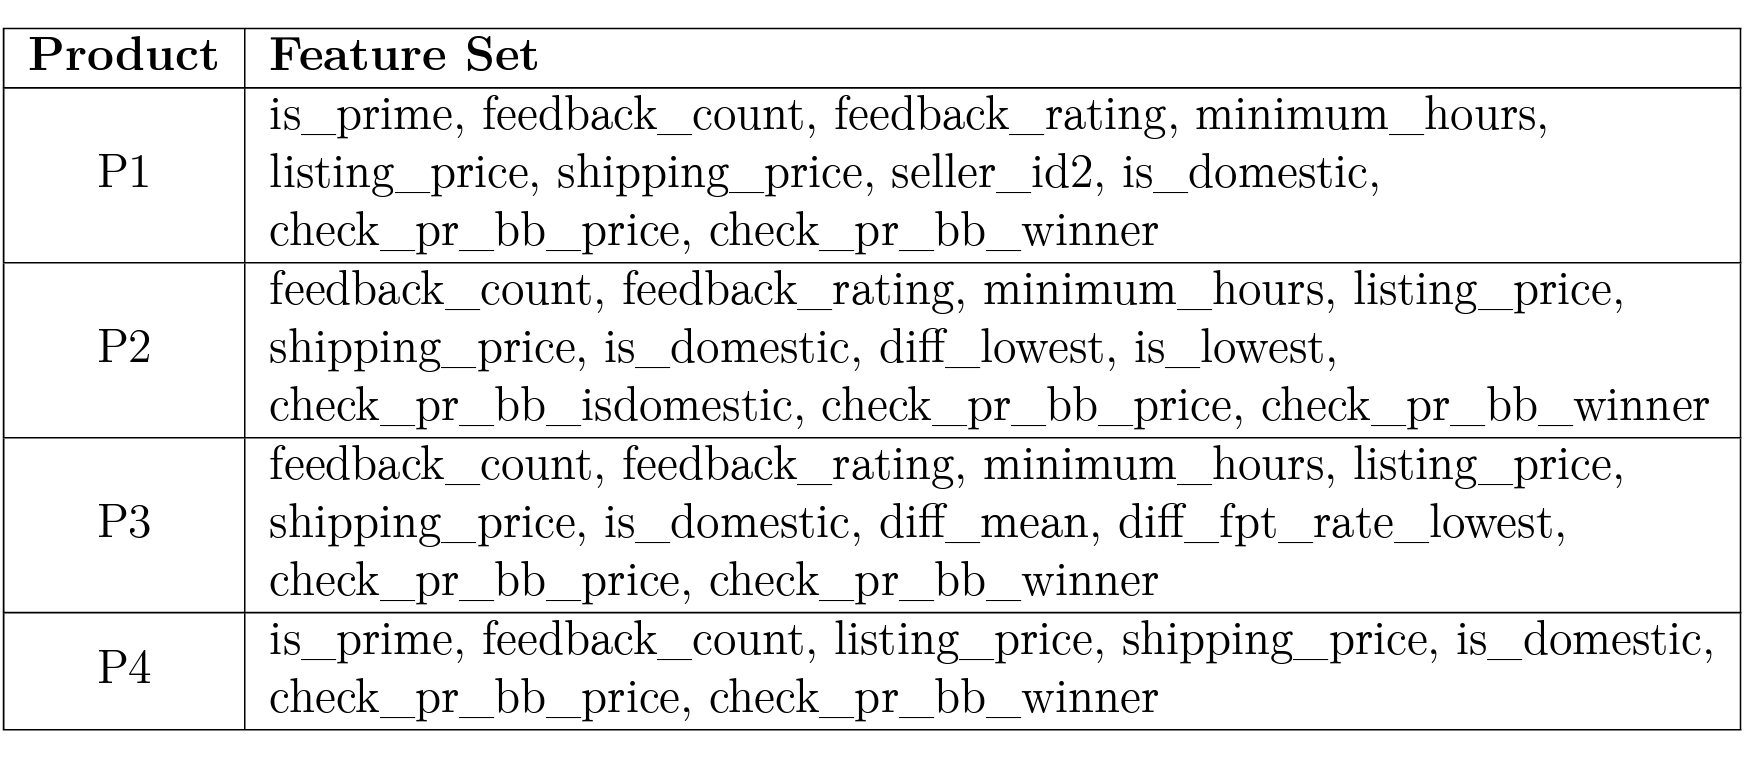

**4.My Features:  ['Sales Rank: Current', 'Sales Rank: Highest', 'Reviews: Rating', 'Reviews: Review Count',
               'Buy Box 🚚: Lowest', 'Buy Box 🚚: Stock', 'Buy Box: Is FBA',
               'Categories: Sub', 'Brand', 'Prime Eligible (Buy Box)', 'Subscribe and Save',
               'New Offer Count: Current', 'Last Price Change' 'Buy Box Seller']**

In [288]:

# Convert 'Last Price Change' to datetime and extract relevant time features
df['Last Price Change'] = pd.to_datetime(df['Last Price Change'])
df['Price Change Month'] = df['Last Price Change'].dt.month
df['Price Change Day'] = df['Last Price Change'].dt.day

In [289]:
# Select relevant features
df = df[['Sales Rank: Current', 'Sales Rank: Highest', 'Reviews: Rating', 'Reviews: Review Count',
               'Buy Box 🚚: Lowest', 'Buy Box 🚚: Stock', 'Buy Box: Is FBA',
               'Categories: Sub', 'Brand', 'Prime Eligible (Buy Box)', 'Subscribe and Save',
               'New Offer Count: Current', 'Price Change Month', 'Price Change Day', 'Buy Box Seller']]

In [290]:
df.head()

Sales Rank: Current  Sales Rank: Highest  Reviews: Rating  \
0            19439.000            97751.000            4.800   
1             1474.000            75454.000            4.400   
2            13289.000           103081.000            4.300   
3             4842.000            98432.000            4.500   
4            17436.000           355250.000            4.500   

   Reviews: Review Count  Buy Box 🚚: Lowest  Buy Box 🚚: Stock  \
0                 26.000             17.500                40   
1                939.000              6.990                12   
2                 56.000              7.450                37   
3                364.000              2.390               382   
4                451.000              3.290               405   

   Buy Box: Is FBA  Categories: Sub     Brand Prime Eligible (Buy Box)  \
0                1         Shampoos   BIOBLAS                      yes   
1                1         Shampoos   BIOBLAS                      yes   
2                1       Schwarztee    Caykur                      yes   
3                1  Einwegbatterien  PoundMax                      yes   
4                1  Einwegbatterien  PoundMax                      yes   

  Subscribe and Save  New Offer Count: Current  Price Change Month  \
0                 no                     3.000                   5   
1                 no                     7.000                   5   
2                 no                     4.000                   5   
3                yes                     2.000                   3   
4                 no                     3.000                   5   

   Price Change Day  Buy Box Seller  
0                31               1  
1                30               0  
2                31               1  
3                22               1  
4                 8               1

In [291]:
df.shape

(538, 15)

In [292]:
df.isnull().sum()

Sales Rank: Current         0
Sales Rank: Highest         0
Reviews: Rating             0
Reviews: Review Count       0
Buy Box 🚚: Lowest           0
Buy Box 🚚: Stock            0
Buy Box: Is FBA             0
Categories: Sub             0
Brand                       0
Prime Eligible (Buy Box)    0
Subscribe and Save          0
New Offer Count: Current    0
Price Change Month          0
Price Change Day            0
Buy Box Seller              0
dtype: int64

## Exploratory Data Analysis and Visualization

In [293]:
df.head(10)

Sales Rank: Current  Sales Rank: Highest  Reviews: Rating  \
0            19439.000            97751.000            4.800   
1             1474.000            75454.000            4.400   
2            13289.000           103081.000            4.300   
3             4842.000            98432.000            4.500   
4            17436.000           355250.000            4.500   
5            23665.000           578752.000            4.400   
6            17857.000            70404.000            4.300   
7            12139.000           272798.000            4.700   
8            11190.000           169894.000            4.100   
9            38512.500            76506.000            4.200   

   Reviews: Review Count  Buy Box 🚚: Lowest  Buy Box 🚚: Stock  \
0                 26.000             17.500                40   
1                939.000              6.990                12   
2                 56.000              7.450                37   
3                364.000              2.390               382   
4                451.000              3.290               405   
5                107.000              3.340                45   
6                 12.000              5.990                37   
7                117.000              2.950               757   
8                 40.000              5.290                37   
9                161.000              2.490                53   

   Buy Box: Is FBA                    Categories: Sub     Brand  \
0                1                           Shampoos   BIOBLAS   
1                1                           Shampoos   BIOBLAS   
2                1                         Schwarztee    Caykur   
3                1                    Einwegbatterien  PoundMax   
4                1                    Einwegbatterien  PoundMax   
5                1                         Schwarztee    Caykur   
6                0  Baby Feuchttücher & Nachfüllungen  Babylove   
7                1                    Einwegbatterien  PoundMax   
8                0                          Kaugummis     Falim   
9                1                         Kategorien    Gülcan   

  Prime Eligible (Buy Box) Subscribe and Save  New Offer Count: Current  \
0                      yes                 no                     3.000   
1                      yes                 no                     7.000   
2                      yes                 no                     4.000   
3                      yes                yes                     2.000   
4                      yes                 no                     3.000   
5                      yes                yes                    11.000   
6                       no                 no                     7.000   
7                      yes                 no                     1.000   
8                      yes                 no                     4.000   
9                      yes                 no                     5.000   

   Price Change Month  Price Change Day  Buy Box Seller  
0                   5                31               1  
1                   5                30               0  
2                   5                31               1  
3                   3                22               1  
4                   5                 8               1  
5                   6                 3               1  
6                   4                10               0  
7                   4                 3               1  
8                   4                 8               0  
9                   5                12               0

In [294]:
df.columns

Index(['Sales Rank: Current', 'Sales Rank: Highest', 'Reviews: Rating',
       'Reviews: Review Count', 'Buy Box 🚚: Lowest', 'Buy Box 🚚: Stock',
       'Buy Box: Is FBA', 'Categories: Sub', 'Brand',
       'Prime Eligible (Buy Box)', 'Subscribe and Save',
       'New Offer Count: Current', 'Price Change Month', 'Price Change Day',
       'Buy Box Seller'],
      dtype='object')

In [295]:
df.shape

(538, 15)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales Rank: Current       538 non-null    float64
 1   Sales Rank: Highest       538 non-null    float64
 2   Reviews: Rating           538 non-null    float64
 3   Reviews: Review Count     538 non-null    float64
 4   Buy Box 🚚: Lowest         538 non-null    float64
 5   Buy Box 🚚: Stock          538 non-null    int64  
 6   Buy Box: Is FBA           538 non-null    int64  
 7   Categories: Sub           538 non-null    object 
 8   Brand                     538 non-null    object 
 9   Prime Eligible (Buy Box)  538 non-null    object 
 10  Subscribe and Save        538 non-null    object 
 11  New Offer Count: Current  538 non-null    float64
 12  Price Change Month        538 non-null    int32  
 13  Price Change Day          538 non-null    int32  
 14  Buy Box Se

In [297]:
df.describe().T

count       mean        std     min       25%  \
Sales Rank: Current      538.000  64397.111  84030.424  83.000 11331.750   
Sales Rank: Highest      538.000 265180.558 530247.926 961.000 92219.250   
Reviews: Rating          538.000      4.377      0.410   1.000     4.300   
Reviews: Review Count    538.000    452.777   1356.482   1.000    34.000   
Buy Box 🚚: Lowest        538.000      9.003      7.389   0.240     3.822   
Buy Box 🚚: Stock         538.000     83.191    164.467   1.000    28.000   
Buy Box: Is FBA          538.000      0.240      0.427   0.000     0.000   
New Offer Count: Current 538.000      4.540      3.240   1.000     2.000   
Price Change Month       538.000      5.348      1.846   1.000     5.000   
Price Change Day         538.000     12.400     10.800   1.000     4.000   
Buy Box Seller           538.000      0.216      0.412   0.000     0.000   

                                50%        75%         max  
Sales Rank: Current       38512.500  84409.500  652904.000  
Sales Rank: Highest      146325.500 253816.250 7095939.000  
Reviews: Rating               4.400      4.600       5.000  
Reviews: Review Count       101.000    383.750   16614.000  
Buy Box 🚚: Lowest             6.990     12.195      52.490  
Buy Box 🚚: Stock             37.000     44.750    1000.000  
Buy Box: Is FBA               0.000      0.000       1.000  
New Offer Count: Current      4.000      6.000      25.000  
Price Change Month            5.000      6.000      12.000  
Price Change Day              6.000     23.000      31.000  
Buy Box Seller                0.000      0.000       1.000

In [298]:
df.columns.value_counts()

Sales Rank: Current         1
Sales Rank: Highest         1
Reviews: Rating             1
Reviews: Review Count       1
Buy Box 🚚: Lowest           1
Buy Box 🚚: Stock            1
Buy Box: Is FBA             1
Categories: Sub             1
Brand                       1
Prime Eligible (Buy Box)    1
Subscribe and Save          1
New Offer Count: Current    1
Price Change Month          1
Price Change Day            1
Buy Box Seller              1
Name: count, dtype: int64

In [299]:
df.isnull().sum()

Sales Rank: Current         0
Sales Rank: Highest         0
Reviews: Rating             0
Reviews: Review Count       0
Buy Box 🚚: Lowest           0
Buy Box 🚚: Stock            0
Buy Box: Is FBA             0
Categories: Sub             0
Brand                       0
Prime Eligible (Buy Box)    0
Subscribe and Save          0
New Offer Count: Current    0
Price Change Month          0
Price Change Day            0
Buy Box Seller              0
dtype: int64

In [300]:
df.nunique()

Sales Rank: Current         482
Sales Rank: Highest         535
Reviews: Rating              27
Reviews: Review Count       280
Buy Box 🚚: Lowest           354
Buy Box 🚚: Stock            135
Buy Box: Is FBA               2
Categories: Sub             131
Brand                       122
Prime Eligible (Buy Box)      2
Subscribe and Save            2
New Offer Count: Current     21
Price Change Month           12
Price Change Day             31
Buy Box Seller                2
dtype: int64

In [301]:
df[df['Buy Box Seller']==1]

Sales Rank: Current  Sales Rank: Highest  Reviews: Rating  \
0              19439.000            97751.000            4.800   
2              13289.000           103081.000            4.300   
3               4842.000            98432.000            4.500   
4              17436.000           355250.000            4.500   
5              23665.000           578752.000            4.400   
7              12139.000           272798.000            4.700   
10             10170.000           299680.000            4.500   
12             12719.000            67667.000            4.200   
15             59968.000           539149.000            4.400   
18             93058.000           558610.000            4.500   
20             59019.000           311864.000            4.500   
21             17436.000           319443.000            4.500   
27            313196.000           612321.000            3.700   
28             28916.000           314366.000            4.500   
29             64356.000           471469.000            4.400   
31            103269.000           808658.000            4.200   
32             18979.000           365636.000            4.600   
37            141072.000           369349.000            4.500   
39             55288.000            81489.000            4.500   
42              8750.000            46179.000            4.500   
43             17644.000           164777.000            5.000   
45            173109.000           433390.000            2.500   
46             12711.000            68704.000            4.500   
47              5262.000            34654.000            4.700   
48              2968.000            61210.000            4.400   
51              8750.000            64676.000            4.500   
52              5225.000           767369.000            4.400   
54              7256.000           349128.000            4.400   
55             28283.000           310782.000            5.000   
58             33556.000           162919.000            4.400   
61             22186.000           101145.000            4.600   
62             57481.000           109825.000            4.500   
66             14784.000           238748.000            4.200   
67             30092.000           128447.000            4.600   
68             72818.000           140352.000            4.000   
69             26932.000            55605.000            5.000   
71             47845.000           146982.000            4.200   
74              4924.000            30460.000            4.200   
77             38533.000           120471.000            4.700   
78              7339.000            31655.000            4.800   
84              4953.000            25288.000            4.379   
88              6577.000            48882.000            4.379   
89             70492.000           148479.000            4.000   
90              8750.000            46179.000            4.500   
92             42624.000           136320.000            4.500   
93             38512.500            33326.000            4.700   
94              9754.000            76764.000            4.300   
96             12735.000            62171.000            4.700   
97             52656.000           100450.000            4.300   
101            33560.000            87685.000            4.400   
103            61787.000           149307.000            4.500   
104            38512.500           125420.000            4.400   
105             6361.000            63739.000            4.600   
106           119632.000           319786.000            5.000   
108            27812.000            69638.000            4.400   
109           120726.000           521908.000            4.321   
111           236488.000           448472.000            4.200   
112            23657.000           136848.000            4.300   
113            24213.000           117011.000            4.000   
118            44043.000           287999.000

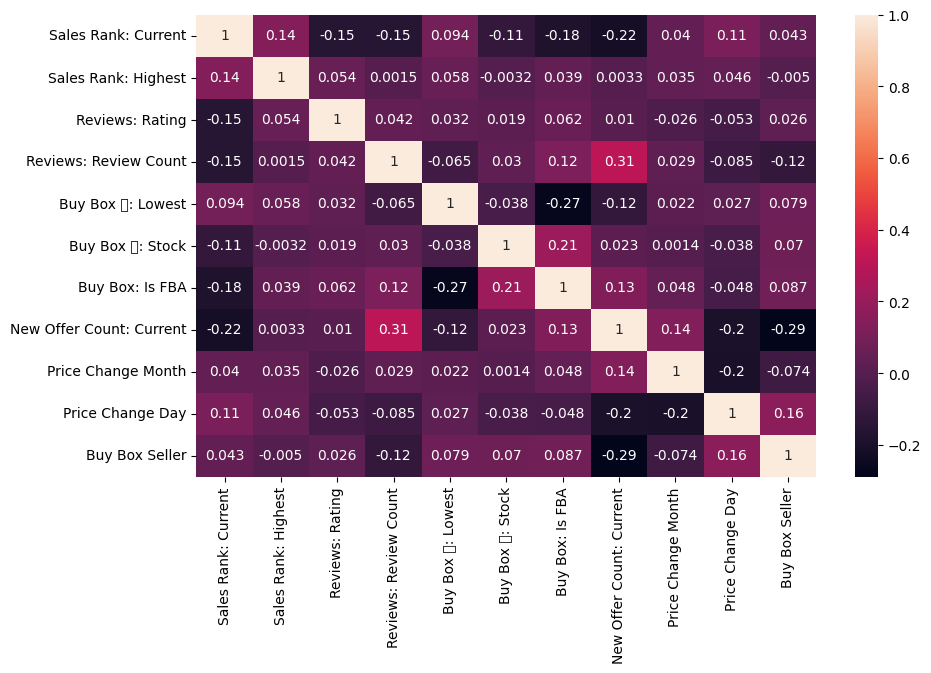

In [302]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True);

In [303]:
df['Buy Box Seller'].value_counts()

Buy Box Seller
0    422
1    116
Name: count, dtype: int64

In [304]:
df['Buy Box Seller'].value_counts(normalize=True)

Buy Box Seller
0   0.784
1   0.216
Name: proportion, dtype: float64

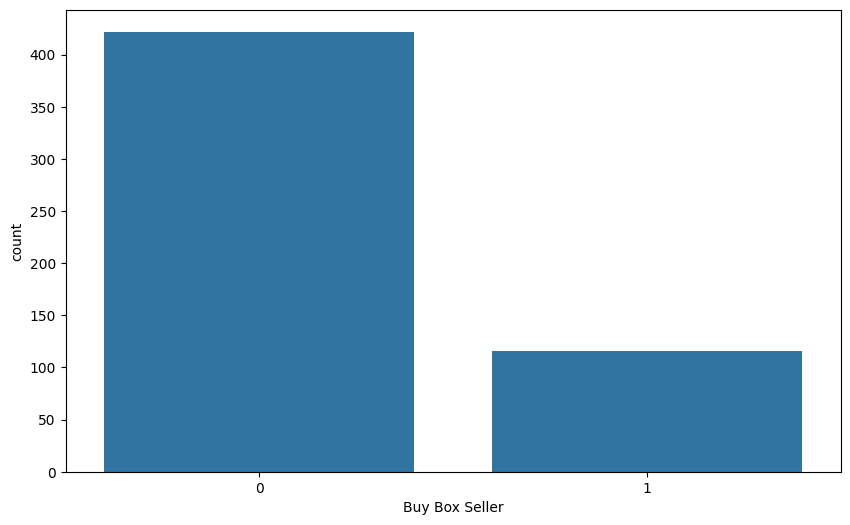

In [305]:
sns.countplot(data = df, x = "Buy Box Seller");

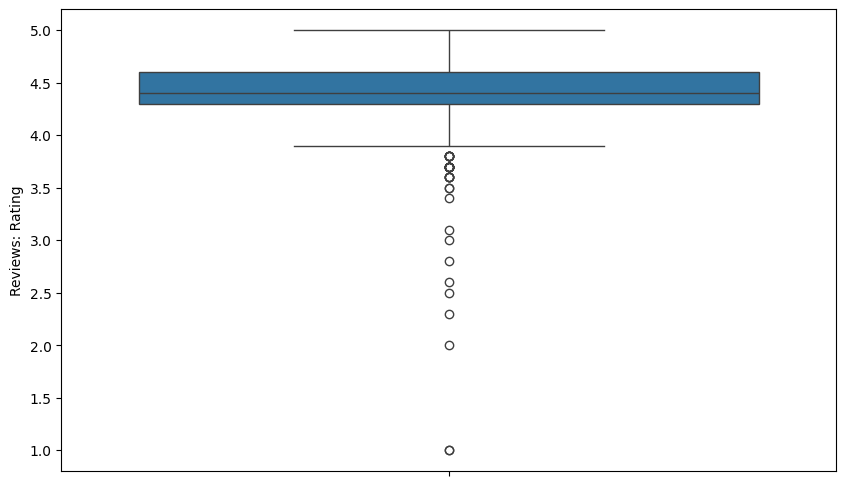

In [306]:
sns.boxplot(data =df, y="Reviews: Rating");

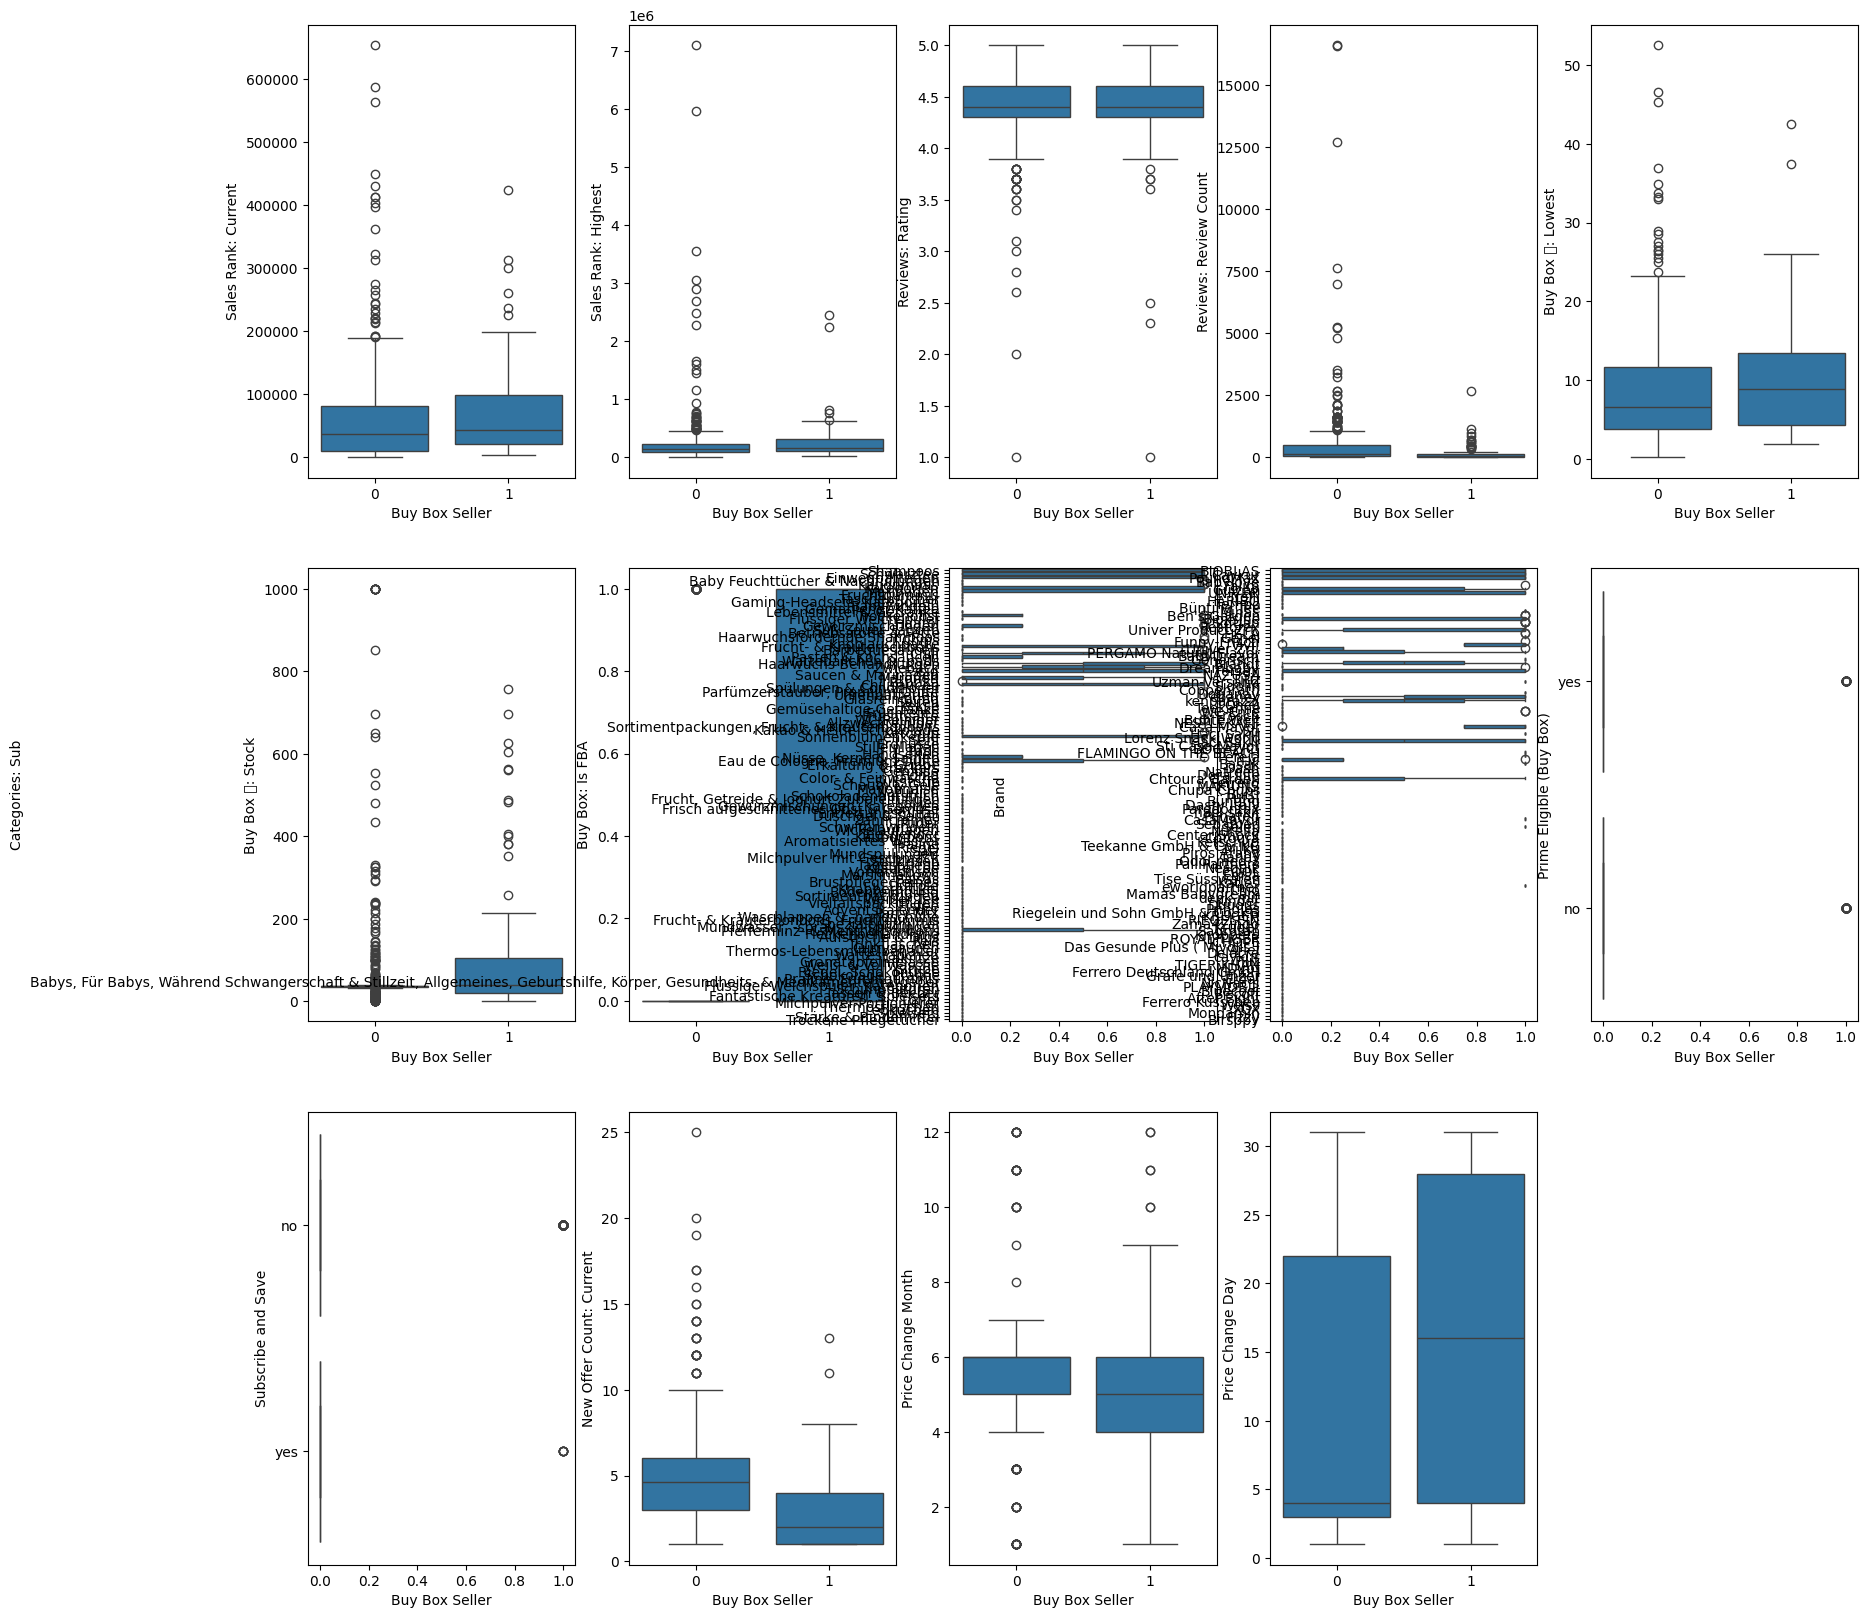

In [307]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Buy Box Seller":
        index += 1
        plt.subplot(3,5,index)
        sns.boxplot(x='Buy Box Seller',y=feature,data=df)
plt.show()

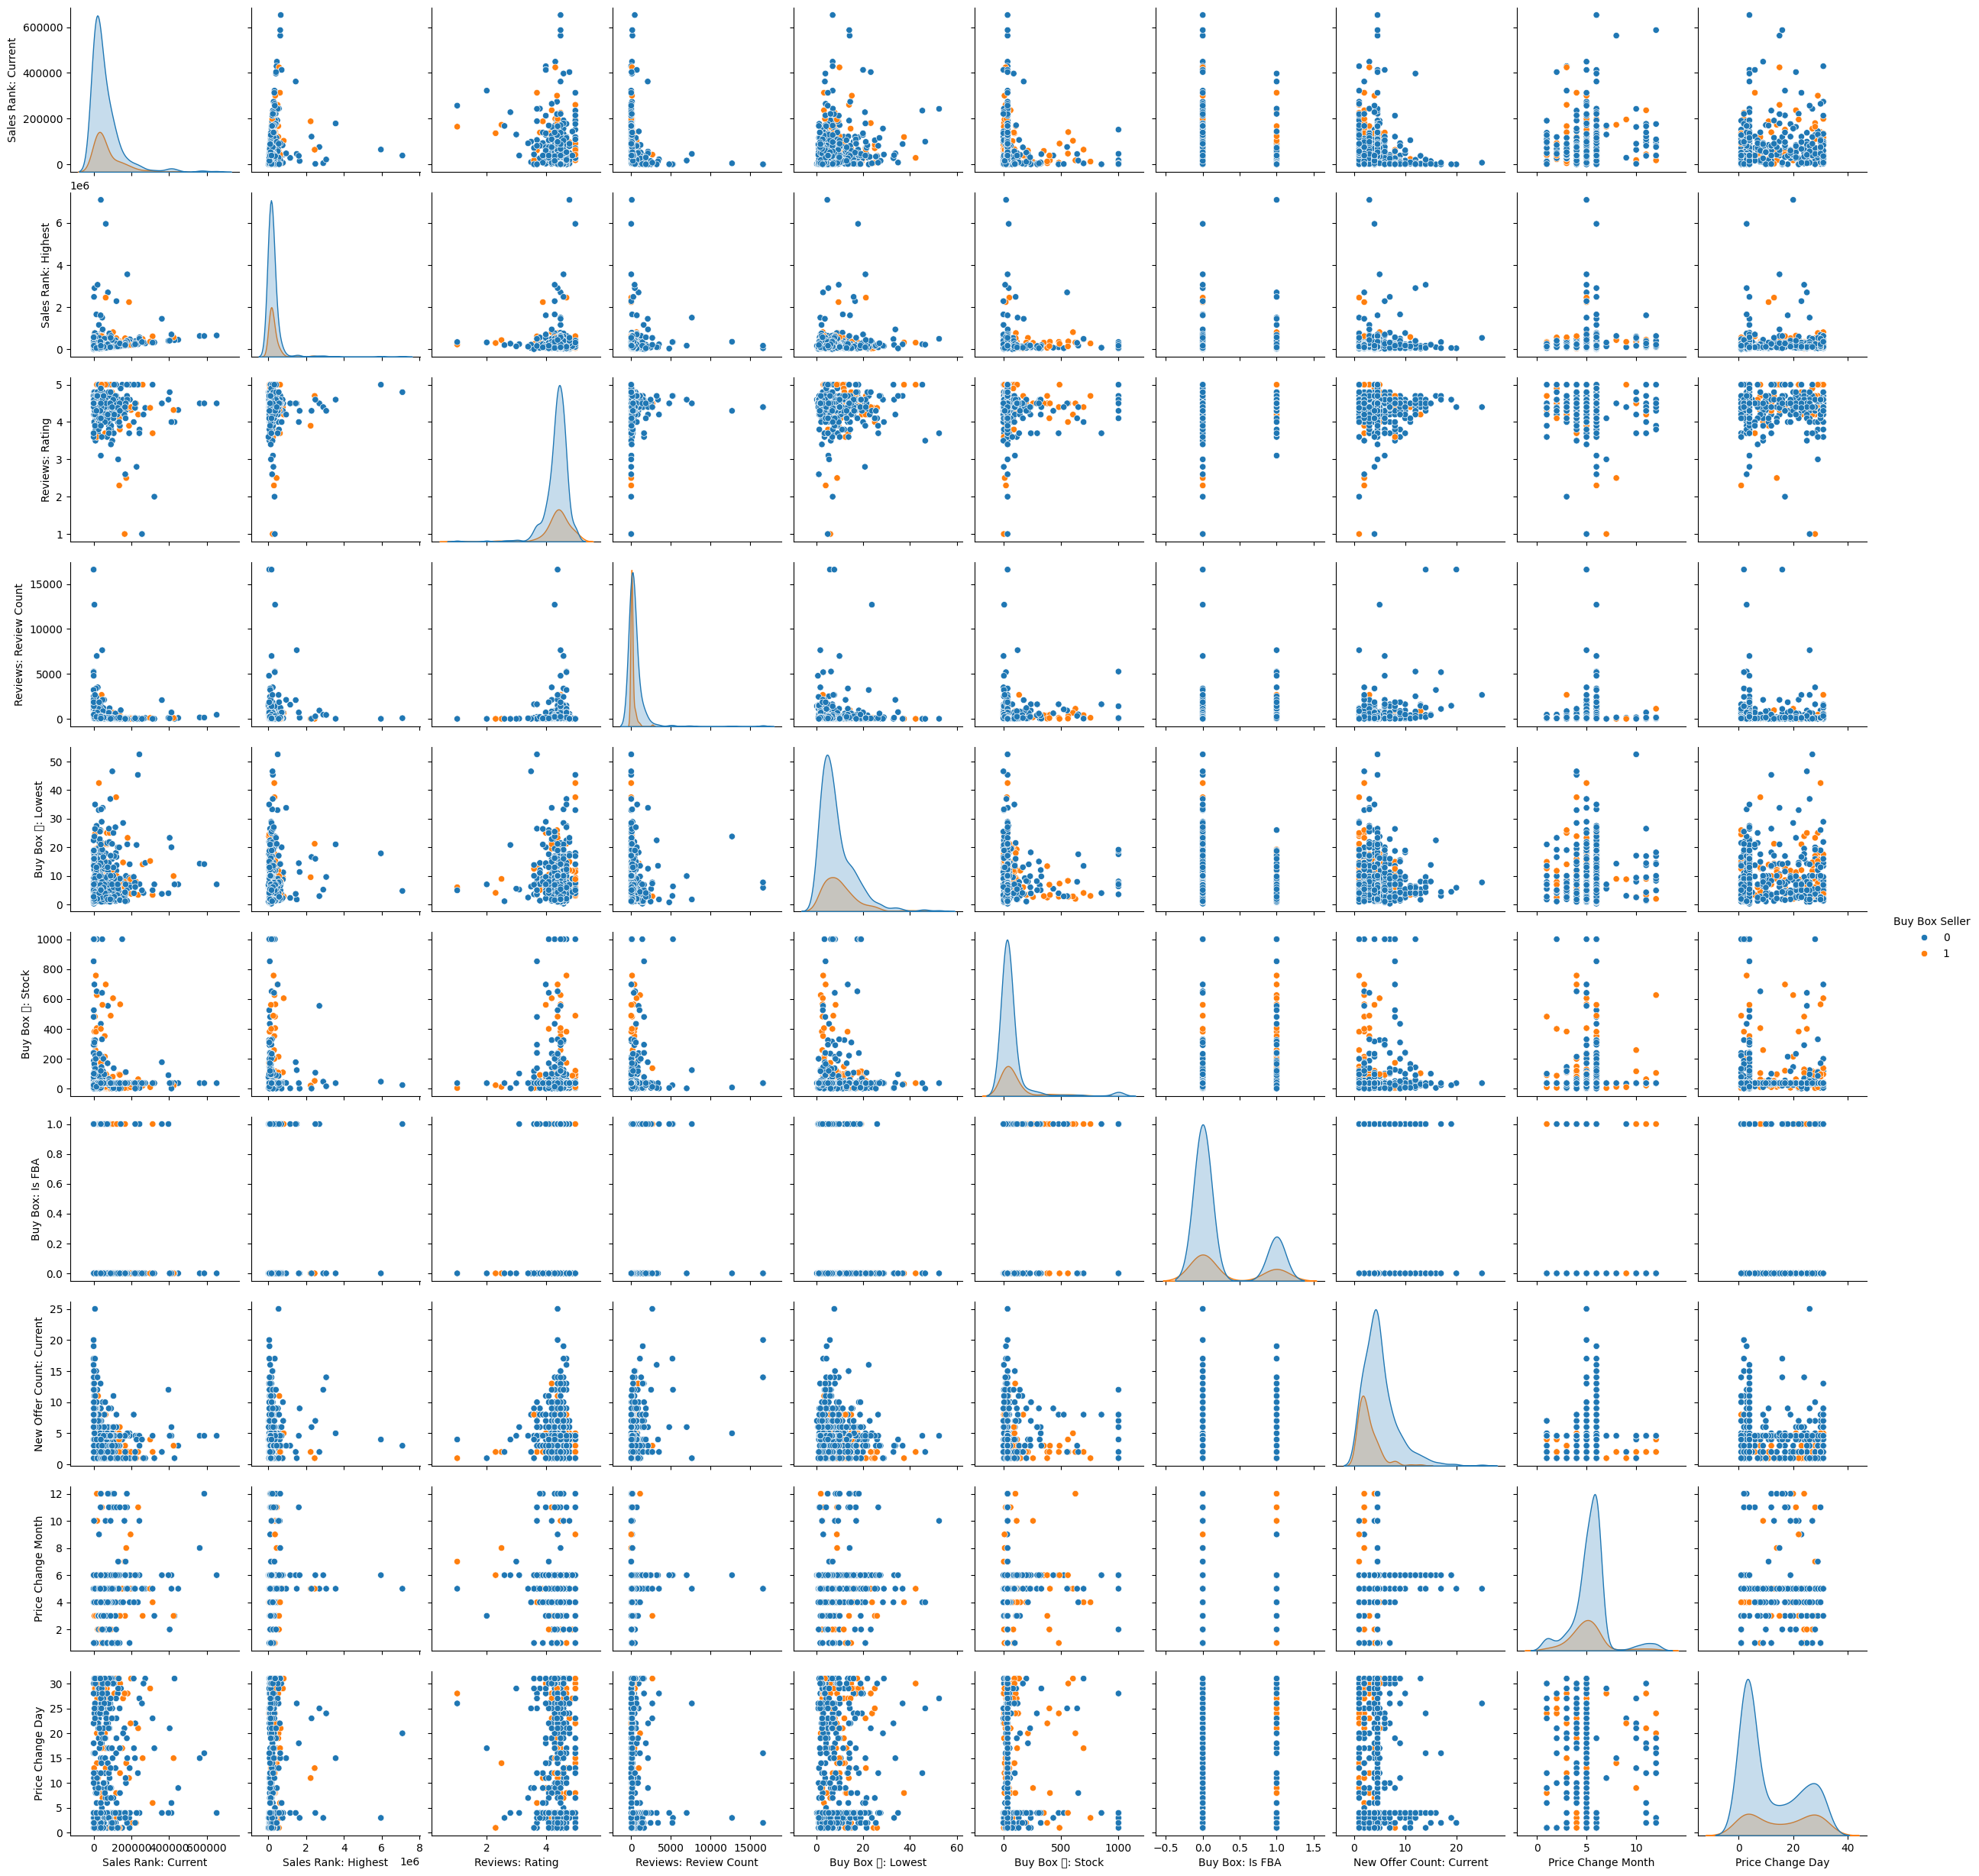

In [308]:
sns.pairplot(df, hue = "Buy Box Seller");

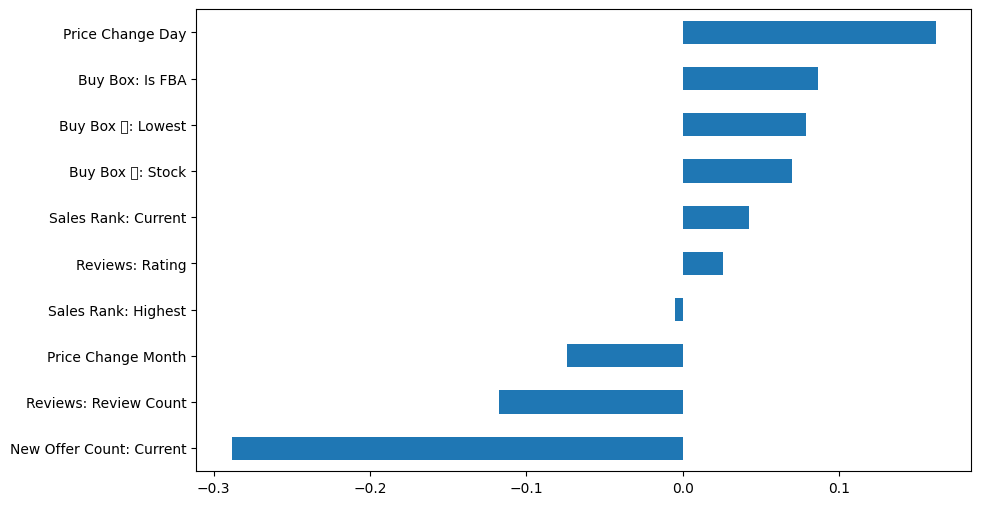

In [309]:
df.select_dtypes('number').corr()["Buy Box Seller"].drop("Buy Box Seller").sort_values().plot.barh();

In [310]:
df['Categories: Sub'].nunique()

131

In [311]:
df['Categories: Sub'].value_counts()

Categories: Sub
Einwegbatterien                                                                                                                  33
Kaugummis                                                                                                                        25
Chips                                                                                                                            24
Shampoos                                                                                                                         23
Gewürzmischungen                                                                                                                 20
Kekse                                                                                                                            19
Ketchup                                                                                                                          19
Kategorien                                                  

In [312]:
# # Function to filter and encode categorical variables with frequency threshold
# def frequency_filtering(df, column, threshold=0.05):
#     # Get the value counts for the column
#     value_counts = df[column].value_counts(normalize=True)

#     # Identify categories to keep
#     categories_to_keep = value_counts[value_counts > threshold].index.tolist()

#     # Replace less frequent categories with 'Other'
#     df[column] = df[column].apply(lambda x: x if x in categories_to_keep else 'Other')

#     return df

# # Apply frequency filtering to 'Categories: Sub' and 'Brand'
# df = frequency_filtering(df, 'Categories: Sub')
# df = frequency_filtering(df, 'Brand')

# # Display the updated DataFrame
# df

In [313]:
df['Categories: Sub'].nunique()

131

## Train | Test Split and Scaling

In [314]:
X = df.drop(["Buy Box Seller"], axis = 1)
y = df["Buy Box Seller"]

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    stratify=y,
                                                    random_state = 42)

In [316]:
X_train['Prime Eligible (Buy Box)'].value_counts()

Prime Eligible (Buy Box)
no     320
yes    164
Name: count, dtype: int64

In [317]:
X_train['Subscribe and Save'].unique()

array(['yes', 'no'], dtype=object)

In [318]:
X_train['Categories: Sub'].nunique()

126

In [319]:
X_train['Brand'].nunique()

115

In [320]:
y_train.nunique()

2

# Logistic Regression

In [321]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('log_model', LogisticRegression(random_state=42))]
log_pipe = Pipeline(steps= operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('log_model', LogisticRegression(random_state=42))])

In [322]:
y_pred = log_pipe.predict(X_test)
y_pred_proba = log_pipe.predict_proba(X_test)

In [323]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(5)

Sales Rank: Current  Sales Rank: Highest  Reviews: Rating  \
372             3609.000           131454.000            4.500   
95             25086.000           221231.000            4.500   
537            90314.000           544840.000            4.800   
31            103269.000           808658.000            4.200   
409            38512.500           158422.000            4.700   

     Reviews: Review Count  Buy Box 🚚: Lowest  Buy Box 🚚: Stock  \
372                418.000              4.000               165   
95                 115.000              6.130                37   
537                 11.000             17.040                37   
31                 675.000              2.790               605   
409               1130.000              1.410                37   

     Buy Box: Is FBA                    Categories: Sub      Brand  \
372                1                         Schwarztee     Duuous   
95                 0  Baby Feuchttücher & Nachfüllungen  Dreambaby   
537                0                              Chips    Birsppy   
31                 1                    Einwegbatterien   PoundMax   
409                0                              Kekse   Knoppers   

    Prime Eligible (Buy Box) Subscribe and Save  New Offer Count: Current  \
372                      yes                 no                    11.000   
95                        no                 no                     6.000   
537                       no                 no                     1.000   
31                       yes                 no                     5.000   
409                      yes                 no                     1.000   

     Price Change Month  Price Change Day  Buy Box Seller  pred  pred_proba  
372                   6                 2               0     0       0.025  
95                    4                21               0     0       0.066  
537                  10                13               0     0       0.350  
31                    5                31               1     0       0.282  
409                   6                 3               0     0       0.062

In [324]:
from sklearn.metrics import confusion_matrix, classification_report

In [325]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [326]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[41  1]
 [11  1]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        42
           1       0.50      0.08      0.14        12

    accuracy                           0.78        54
   macro avg       0.64      0.53      0.51        54
weighted avg       0.72      0.78      0.71        54


Train_Set
[[369  11]
 [ 77  27]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       380
           1       0.71      0.26      0.38       104

    accuracy                           0.82       484
   macro avg       0.77      0.62      0.64       484
weighted avg       0.80      0.82      0.78       484



In [327]:
y_pred = log_pipe.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_accuracy = accuracy_score(y_test, y_pred)

## With Smote

In [328]:
from sklearn.impute import SimpleImputer

# Define column transformers
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('log_model', LogisticRegression(random_state=42))
]

# Create the pipeline
log_pipe_smote = Pipeline(steps=operations)

# Fit the model
log_pipe_smote.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('log_model', LogisticRegression(random_state=42))])

In [329]:
eval_metric(log_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[30 12]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        42
           1       0.43      0.75      0.55        12

    accuracy                           0.72        54
   macro avg       0.67      0.73      0.67        54
weighted avg       0.80      0.72      0.74        54


Train_Set
[[260 120]
 [ 22  82]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79       380
           1       0.41      0.79      0.54       104

    accuracy                           0.71       484
   macro avg       0.66      0.74      0.66       484
weighted avg       0.81      0.71      0.73       484



## Cross Validate

In [330]:
from sklearn.model_selection import cross_validate

model = log_pipe_smote

scores = cross_validate(model, X_train, y_train, scoring = ["precision",
                                                                   "recall",
                                                                   "f1",
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1      0.122       0.030           0.381        0.727    0.500          0.673
2      0.180       0.072           0.474        0.818    0.600          0.755
3      0.128       0.053           0.450        0.818    0.581          0.735
4      0.161       0.064           0.385        0.455    0.417          0.714
5      0.152       0.036           0.391        0.900    0.545          0.688
6      0.174       0.029           0.500        0.700    0.583          0.792
7      0.118       0.026           0.500        0.800    0.615          0.792
8      0.118       0.058           0.467        0.700    0.560          0.771
9      0.132       0.025           0.421        0.800    0.552          0.729
10     0.159       0.038           0.412        0.700    0.519          0.729

In [331]:
df_scores.mean()[2:]

test_precision   0.438
test_recall      0.742
test_f1          0.547
test_accuracy    0.738
dtype: float64

## GridSearchCV

In [332]:
from sklearn.model_selection import GridSearchCV

In [333]:
# Define parameter grid for GridSearchCV
param_grid = {
    'log_model__C': [0.1, 1, 10, 100],
    'log_model__solver': ['liblinear', 'saga']
}

# Create GridSearchCV
grid_model = GridSearchCV(estimator=log_pipe, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Fit the model
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('log_model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'log_model__C': [0.1, 1, 10, 100],
                         'log_model__solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [334]:
grid_model.best_params_

{'log_model__C': 10, 'log_model__solver': 'liblinear'}

In [335]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  1]
 [11  1]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        42
           1       0.50      0.08      0.14        12

    accuracy                           0.78        54
   macro avg       0.64      0.53      0.51        54
weighted avg       0.72      0.78      0.71        54


Train_Set
[[368  12]
 [ 70  34]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       380
           1       0.74      0.33      0.45       104

    accuracy                           0.83       484
   macro avg       0.79      0.65      0.68       484
weighted avg       0.82      0.83      0.80       484



## Best Score

In [336]:
grid_model.best_score_

0.2910679591080036

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [337]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

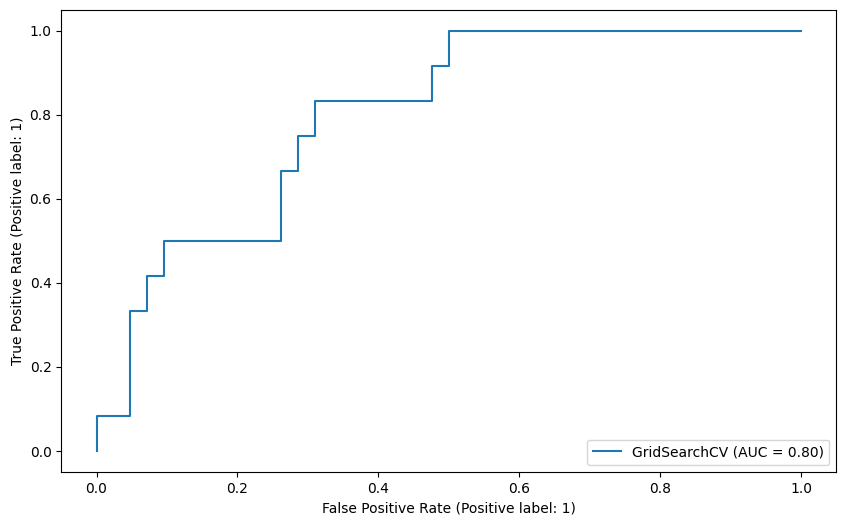

In [338]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

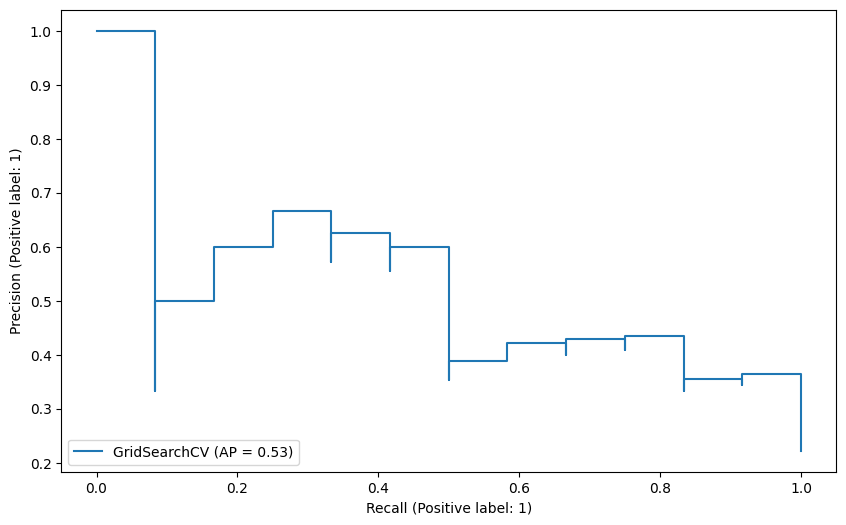

In [339]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

In [340]:
y_pred_proba = grid_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.8113107287449393

In [341]:
fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1])

In [342]:
fp_tp_th = fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1])
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

0     1     2     3     4     5     6     7     8     9     10    11   \
0 0.000 0.000 0.000 0.003 0.003 0.005 0.005 0.011 0.011 0.013 0.013 0.016   
1 0.000 0.010 0.087 0.087 0.096 0.096 0.135 0.135 0.163 0.163 0.183 0.183   
2   inf 0.855 0.695 0.691 0.660 0.641 0.612 0.604 0.564 0.561 0.554 0.554   

    12    13    14    15    16    17    18    19    20    21    22    23   \
0 0.016 0.024 0.024 0.026 0.026 0.029 0.029 0.032 0.032 0.039 0.039 0.042   
1 0.212 0.212 0.221 0.221 0.231 0.231 0.269 0.269 0.365 0.365 0.375 0.375   
2 0.543 0.538 0.537 0.527 0.527 0.526 0.517 0.512 0.491 0.488 0.484 0.480   

    24    25    26    27    28    29    30    31    32    33    34    35   \
0 0.042 0.045 0.045 0.047 0.047 0.050 0.050 0.053 0.053 0.063 0.063 0.068   
1 0.394 0.394 0.404 0.404 0.413 0.413 0.452 0.452 0.462 0.462 0.481 0.481   
2 0.480 0.476 0.471 0.470 0.468 0.467 0.453 0.451 0.446 0.436 0.435 0.424   

    36    37    38    39    40    41    42    43    44    45    46    47   \
0 0.068 0.071 0.071 0.087 0.087 0.092 0.092 0.095 0.095 0.103 0.103 0.105   
1 0.490 0.490 0.510 0.510 0.519 0.519 0.529 0.529 0.538 0.538 0.548 0.548   
2 0.422 0.422 0.422 0.409 0.406 0.401 0.398 0.397 0.396 0.395 0.394 0.392   

    48    49    50    51    52    53    54    55    56    57    58    59   \
0 0.105 0.113 0.113 0.134 0.134 0.145 0.145 0.150 0.150 0.166 0.166 0.174   
1 0.567 0.567 0.596 0.596 0.615 0.615 0.625 0.625 0.635 0.635 0.654 0.654   
2 0.389 0.371 0.368 0.359 0.359 0.346 0.344 0.342 0.341 0.327 0.323 0.320   

    60    61    62    63    64    65    66    67    68    69    70    71   \
0 0.174 0.176 0.176 0.184 0.184 0.187 0.187 0.192 0.192 0.221 0.221 0.242   
1 0.663 0.663 0.673 0.673 0.692 0.692 0.702 0.702 0.712 0.712 0.721 0.721   
2 0.320 0.319 0.318 0.314 0.303 0.298 0.298 0.296 0.295 0.284 0.282 0.268   

    72    73    74    75    76    77    78    79    80    81    82    83   \
0 0.242 0.250 0.250 0.258 0.258 0.268 0.268 0.276 0.276 0.287 0.287 0.305   
1 0.731 0.731 0.740 0.740 0.750 0.750 0.760 0.760 0.769 0.769 0.779 0.779   
2 0.267 0.262 0.260 0.259 0.259 0.251 0.247 0.241 0.240 0.233 0.232 0.214   

    84    85    86    87    88    89    90    91    92    93    94    95   \
0 0.305 0.337 0.337 0.395 0.395 0.397 0.397 0.413 0.413 0.418 0.418 0.426   
1 0.788 0.788 0.798 0.798 0.817 0.817 0.827 0.827 0.837 0.837 0.846 0.846   
2 0.214 0.201 0.199 0.167 0.165 0.165 0.163 0.156 0.156 0.155 0.155 0.153   

    96    97    98    99    100   101   102   103   104   105   106   107  \
0 0.426 0.453 0.453 0.484 0.484 0.553 0.553 0.555 0.555 0.566 0.566 0.574   
1 0.856 0.856 0.865 0.865 0.875 0.875 0.885 0.885 0.894 0.894 0.904 0.904   
2 0.152 0.144 0.141 0.131 0.131 0.110 0.108 0.108 0.108 0.107 0.106 0.104   

    108   109   110   111   112   113   114   115   116   117   118   119  \
0 0.574 0.674 0.674 0.695 0.695 0.726 0.726 0.787 0.787 0.829 0.829 0.866   
1 0.913 0.913 0.923 0.923 0.933 0.933 0.942 0.942 0.962 0.962 0.971 0.971   
2 0.102 0.066 0.065 0.058 0.058 0.051 0.051 0.039 0.038 0.029 0.027 0.020   

    120   121   122   123   124   125  
0 0.866 0.918 0.918 0.934 0.934 1.000  
1 0.981 0.981 0.990 0.990 1.000 1.000  
2 0.020 0.010 0.010 0.008 0.008 0.000

In [343]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_treshold = tresholds[optimal_idx]
optimal_treshold

0.29483421679782135

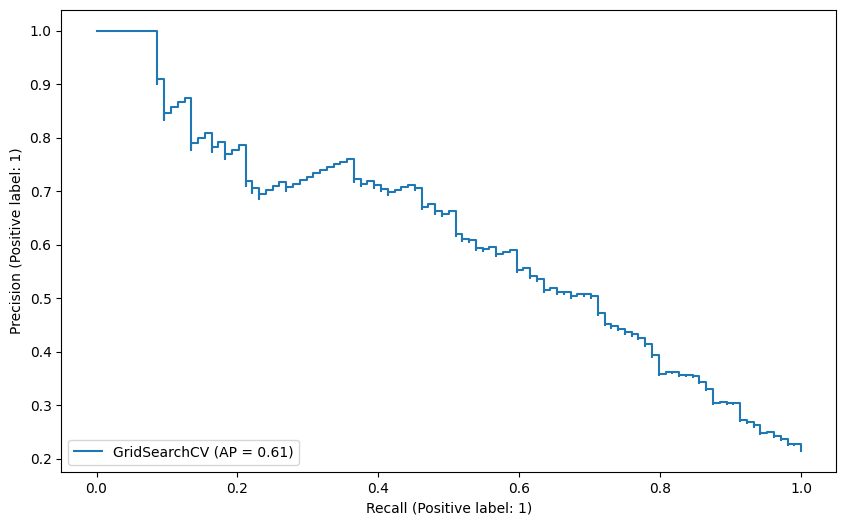

In [344]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train, y_train);

In [345]:
y_pred_proba = grid_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:, 1])

0.610929293455511

In [346]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:, 1])

In [347]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.36781642286428234

In [348]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [349]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[35  7]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.46      0.50      0.48        12

    accuracy                           0.76        54
   macro avg       0.66      0.67      0.66        54
weighted avg       0.77      0.76      0.76        54



In [350]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [351]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

In [352]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.model_selection import StratifiedKFold
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [353]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('log_model', LogisticRegression(random_state=42))
]

# Create the pipeline
log_pipe_smote = Pipeline(steps=operations)

# Fit the model
log_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('log_model', LogisticRegression(random_state=42))])

In [354]:
y_pred = log_pipe_smote.predict(X_test)
log_f1_smote = f1_score(y_test, y_pred)
log_accuracy_smote = accuracy_score(y_test, y_pred)

# Random Forest

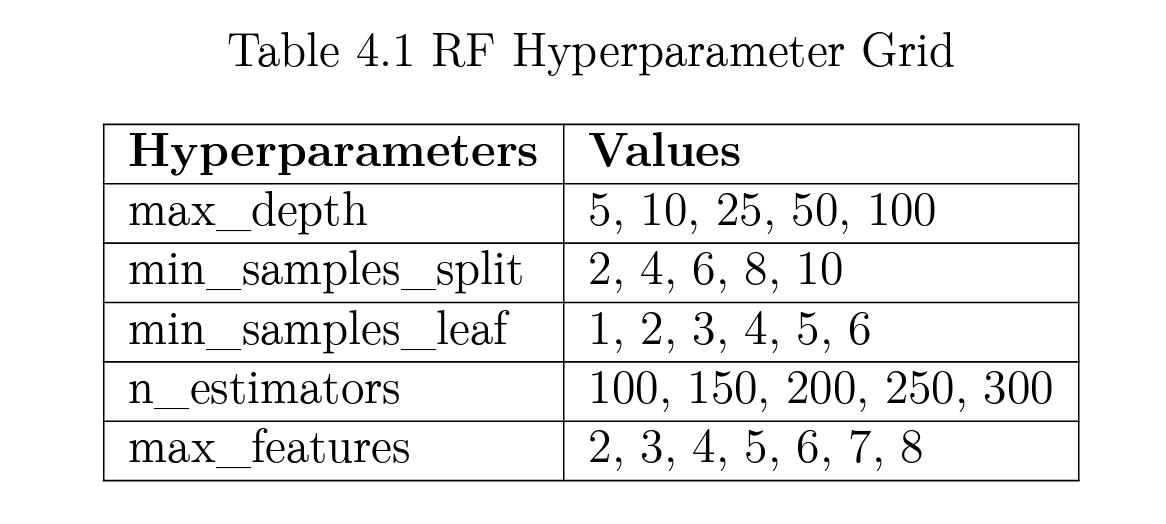

In [355]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('RF_model', RandomForestClassifier(random_state=42))]
RF_pipe = Pipeline(steps= operations)

RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [356]:
eval_metric(RF_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[40  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.67      0.33      0.44        12

    accuracy                           0.81        54
   macro avg       0.75      0.64      0.67        54
weighted avg       0.80      0.81      0.79        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



## CV

In [357]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(random_state=101))]
RF_pipe = Pipeline(steps= operations)

scores = cross_validate(RF_pipe, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.853
train_accuracy    1.000
test_precision    0.857
train_precision   1.000
test_recall       0.405
train_recall      1.000
test_f1           0.525
train_f1          1.000
dtype: float64

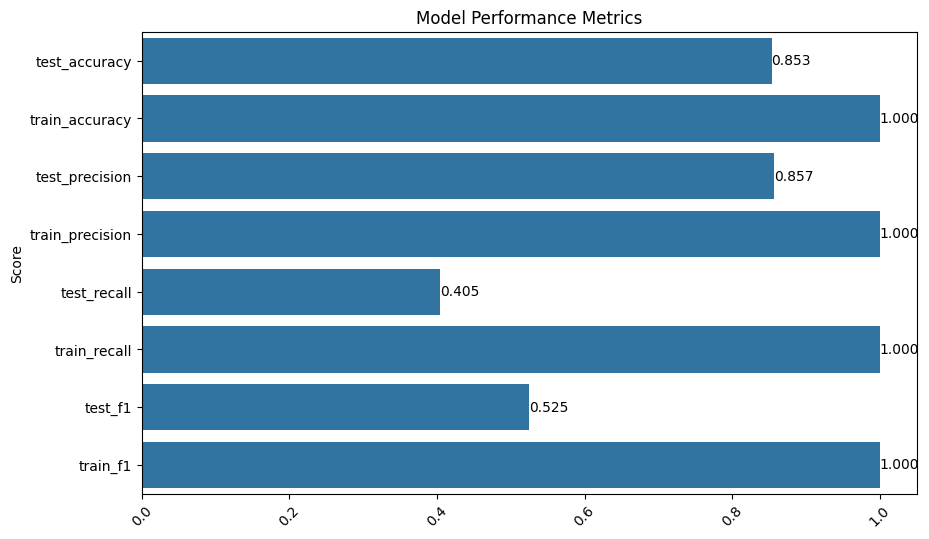

In [358]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

In [359]:
RF_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Prime Eligible (Buy Box)',
                                     'Subscribe and Save']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Categories: Sub', 'Brand'])])),
  ('RF_model', RandomForestClassifier(random_state=101))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEnc

## Grid Search

In [360]:
param_grid = {'RF_model__n_estimators':[64,100, 128],
             'RF_model__max_features':[4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4, 5, None],
             'RF_model__min_samples_split':[2,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1, None]}

In [361]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(random_state=101))]
RF_pipe = Pipeline(steps= operations)

RF_grid = GridSearchCV(RF_pipe, param_grid, scoring = "f1", n_jobs = -1)

RF_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4, 5, None],
                         'RF_model__max_features': [4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1, None],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 4],
                         'RF_model__n_estimators': [64, 100, 128]},
             scoring='f1')

In [362]:
eval_metric(RF_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  2]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        42
           1       0.60      0.25      0.35        12

    accuracy                           0.80        54
   macro avg       0.71      0.60      0.62        54
weighted avg       0.77      0.80      0.76        54


Train_Set
[[379   1]
 [ 21  83]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       380
           1       0.99      0.80      0.88       104

    accuracy                           0.95       484
   macro avg       0.97      0.90      0.93       484
weighted avg       0.96      0.95      0.95       484



In [363]:
RF_grid.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_features': 4,
 'RF_model__max_samples': None,
 'RF_model__min_samples_leaf': 3,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 100}

In [364]:
operations = [
    ('preprocessor', column_trans),
    ('RF_model', RandomForestClassifier(max_depth=None,
                                        max_features=4,
                                        max_samples=None,
                                        min_samples_leaf=2,
                                        min_samples_split=2,
                                        n_estimators=64))]
RF_pipe = Pipeline(steps= operations)
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('RF_model',
                 RandomForestClassifier(max_features=4, min_samples_leaf=2,
                                        n_estimators=64))])

In [365]:
y_pred = RF_pipe.predict(X_test)
RF_f1 = f1_score(y_test, y_pred)
RF_accuracy = accuracy_score(y_test, y_pred)

## Smote

In [366]:
from sklearn.impute import SimpleImputer

# Define column transformers
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('RF_model', RandomForestClassifier(random_state=42))
]

# Create the pipeline
RF_pipe_smote = Pipeline(steps=operations)

# Fit the model
RF_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [367]:
eval_metric(RF_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[38  4]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.64      0.58      0.61        12

    accuracy                           0.83        54
   macro avg       0.76      0.74      0.75        54
weighted avg       0.83      0.83      0.83        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [368]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('RF_model', RandomForestClassifier(random_state=42))]


RF_pipe_smote = Pipeline(steps= operations)

scores = cross_validate(RF_pipe_smote, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.841
train_accuracy    1.000
test_precision    0.670
train_precision   1.000
test_recall       0.567
train_recall      1.000
test_f1           0.597
train_f1          1.000
dtype: float64

In [369]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('RF_model', RandomForestClassifier(random_state=42))]

RF_pipe_smote = Pipeline(steps= operations)

RF_grid = GridSearchCV(RF_pipe_smote, param_grid, scoring = "f1", n_jobs = -1)

RF_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Cat...
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4, 5, None],
                         'RF_model__max_features': [4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1, None],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 4],
                         'RF_model__n_estimators': [64, 100, 128]},
             scoring='f1')

In [370]:
eval_metric(RF_grid, X_train, y_train, X_test, y_test)

Test_Set
[[36  6]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.50      0.50      0.50        12

    accuracy                           0.78        54
   macro avg       0.68      0.68      0.68        54
weighted avg       0.78      0.78      0.78        54


Train_Set
[[368  12]
 [ 10  94]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       380
           1       0.89      0.90      0.90       104

    accuracy                           0.95       484
   macro avg       0.93      0.94      0.93       484
weighted avg       0.95      0.95      0.95       484



## Best Score

In [371]:
RF_grid.best_score_

0.6151028787402064

In [372]:
RF_grid.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_features': 'sqrt',
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 4,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 100}

## Feature Importancy

In [373]:
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('RF_model', RandomForestClassifier(max_depth=5,
                                        max_features=4,
                                        max_samples=0.8,
                                        min_samples_leaf=2,
                                        min_samples_split=2,
                                        n_estimators=128,
                                        random_state=42))]
RF_pipe_smote = Pipeline(steps= operations)
RF_pipe_smote.fit(X_train, y_train)

RF_pipe_smote['RF_model'].feature_importances_

array([0.021797  , 0.00356445, 0.02785225, 0.05591067, 0.06820146,
       0.02663916, 0.0231655 , 0.05485996, 0.07317781, 0.22721944,
       0.02984246, 0.25555924, 0.05216874, 0.08004185])

In [374]:
feats = pd.DataFrame(index=X.columns, data= RF_pipe_smote['RF_model'].feature_importances_, columns=['RF_importance'])
RF_imp_feats = feats.sort_values("RF_importance", ascending = False)
RF_imp_feats

RF_importance
New Offer Count: Current          0.256
Prime Eligible (Buy Box)          0.227
Price Change Day                  0.080
Brand                             0.073
Buy Box 🚚: Lowest                 0.068
Reviews: Review Count             0.056
Categories: Sub                   0.055
Price Change Month                0.052
Subscribe and Save                0.030
Reviews: Rating                   0.028
Buy Box 🚚: Stock                  0.027
Buy Box: Is FBA                   0.023
Sales Rank: Current               0.022
Sales Rank: Highest               0.004

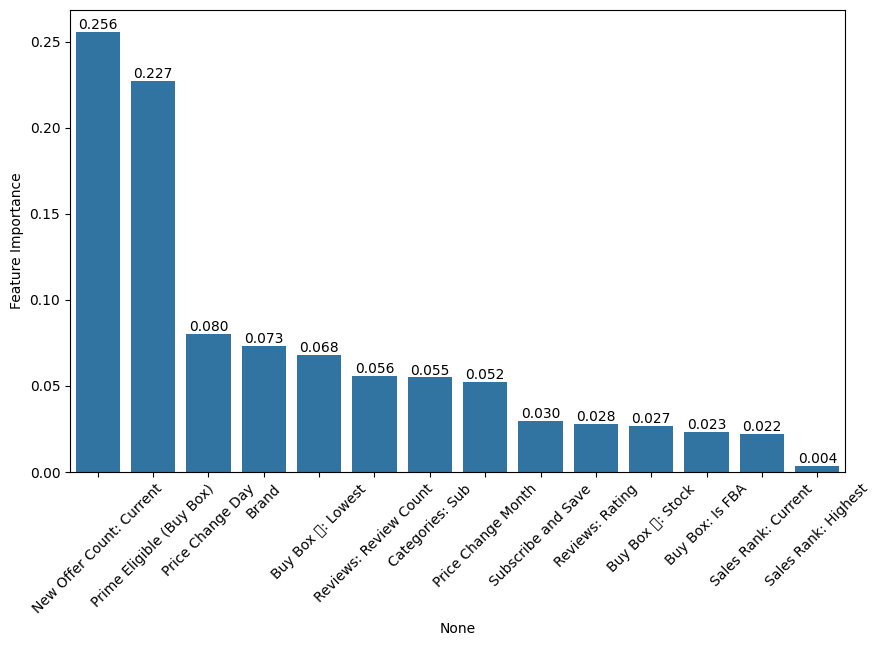

In [375]:
df_fi = pd.DataFrame(data = RF_pipe_smote["RF_model"].feature_importances_, index =X.columns,
                              columns = ["Feature Importance"])

df_fi = df_fi.sort_values("Feature Importance", ascending = False)

ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 45)
plt.show();

In [376]:
y_pred = RF_pipe_smote.predict(X_test)
RF_f1_smote = f1_score(y_test, y_pred)
RF_accuracy_smote = accuracy_score(y_test, y_pred)

# XGBoost

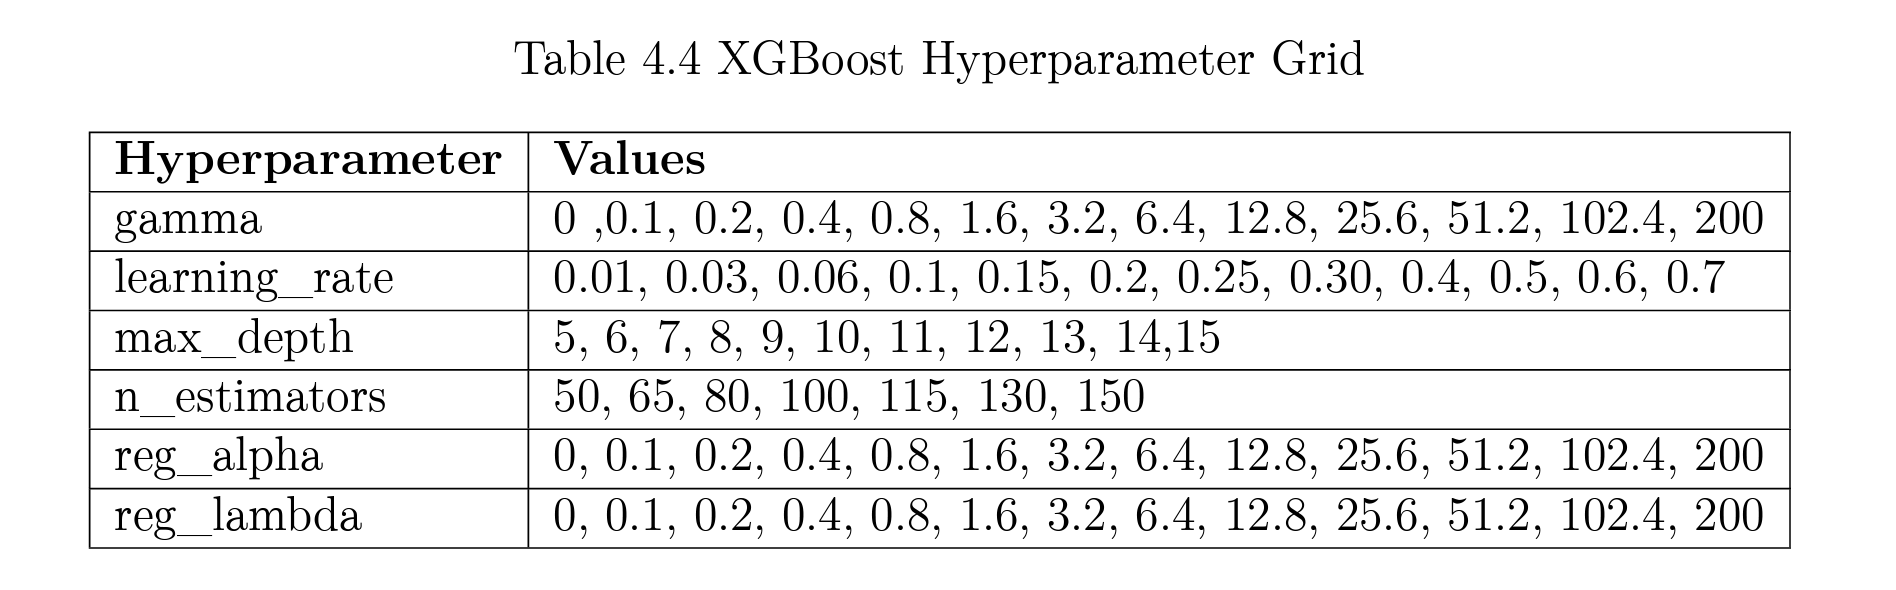

In [377]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('xgb_model', XGBClassifier(random_state=42))]
XGB_pipe = Pipeline(steps= operations)

XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('xgb_m...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [378]:
eval_metric(XGB_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[38  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.60      0.50      0.55        12

    accuracy                           0.81        54
   macro avg       0.73      0.70      0.71        54
weighted avg       0.81      0.81      0.81        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



## CV

In [379]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=42))]
xgb_pipe = Pipeline(steps= operations)

scores = cross_validate(xgb_pipe, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.845
train_accuracy    1.000
test_precision    0.694
train_precision   1.000
test_recall       0.509
train_recall      1.000
test_f1           0.575
train_f1          1.000
dtype: float64

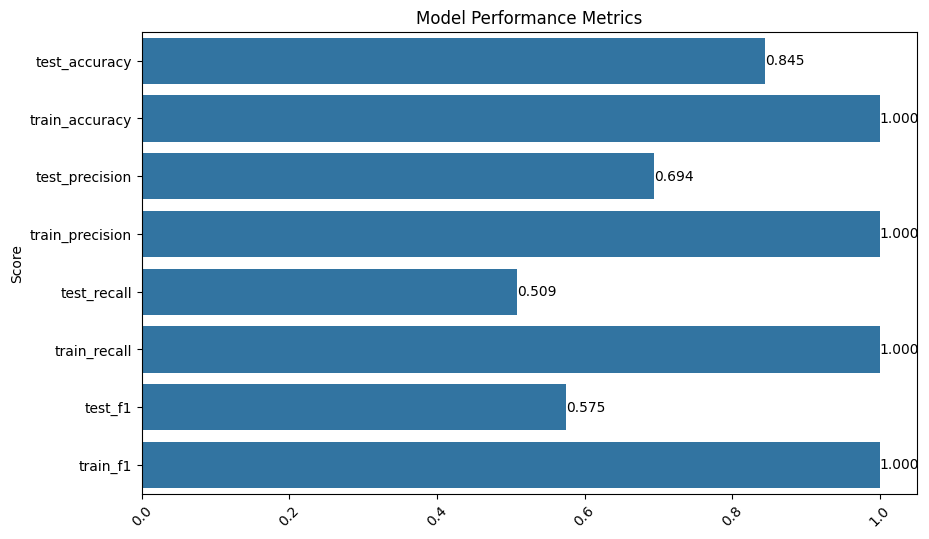

In [380]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

In [381]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Prime Eligible (Buy Box)',
                                     'Subscribe and Save']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Categories: Sub', 'Brand'])])),
  ('xgb_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
          

## Grid Search

In [382]:
param_grid = {
    "xgb_model__n_estimators": [50, 100, 200],
    "xgb_model__max_depth": [3, 4, 5],
    "xgb_model__learning_rate": [0.01, 0.1, 1.0],
    "xgb_model__subsample": [0.5, 0.8],
    "xgb_model__colsample_bytree": [0.5, 0.8]}

In [383]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=42))]
xgb_pipe = Pipeline(steps= operations)

xgb_grid = GridSearchCV(xgb_pipe, param_grid, scoring = "f1", n_jobs = -1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Cat...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb_model__colsample_bytree': [0.5, 0.8],
                         'xgb_model__learning_rate': [0.01, 0.1, 1.0],
                         'xgb_model__max_depth': [3, 4, 5],
                         'xgb_model__n_estimators': [50, 100, 200],
                         'xgb_model__subsample': [0.5, 0.8]},
             scoring='f1')

In [384]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[39  3]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.62      0.42      0.50        12

    accuracy                           0.81        54
   macro avg       0.74      0.67      0.69        54
weighted avg       0.80      0.81      0.80        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [385]:
xgb_grid.best_params_

{'xgb_model__colsample_bytree': 0.5,
 'xgb_model__learning_rate': 1.0,
 'xgb_model__max_depth': 4,
 'xgb_model__n_estimators': 50,
 'xgb_model__subsample': 0.8}

In [386]:
operations = [
    ('preprocessor', column_trans),
    ('xgb_model', XGBClassifier(random_state=42,
                                colsample_bytree =0.8,
                                learning_rate=0.1,
                                max_depth=3,
                                n_estimators=100,
                                subsample=0.8))]

xgb_pipe = Pipeline(steps= operations)

xgb_pipe .fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('xgb_m...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [387]:
y_pred = xgb_pipe.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)

## Smote

In [388]:
from sklearn.impute import SimpleImputer

# Define column transformers
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('xgb_model', XGBClassifier(random_state=42))
]

# Create the pipeline
xgb_pipe_smote = Pipeline(steps=operations)

# Fit the model
xgb_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [389]:
eval_metric(xgb_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[36  6]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.57      0.67      0.62        12

    accuracy                           0.81        54
   macro avg       0.74      0.76      0.75        54
weighted avg       0.83      0.81      0.82        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [390]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('xgb_model', XGBClassifier(random_state=42))]


xgb_pipe_smote = Pipeline(steps= operations)

scores = cross_validate(xgb_pipe_smote, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.833
train_accuracy    1.000
test_precision    0.608
train_precision   1.000
test_recall       0.605
train_recall      1.000
test_f1           0.602
train_f1          1.000
dtype: float64

In [391]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('xgb_model', XGBClassifier(random_state=42))]


xgb_pipe_smote = Pipeline(steps= operations)

xgb_grid = GridSearchCV(xgb_pipe_smote, param_grid, scoring = "f1", n_jobs = -1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Cat...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb_model__colsample_bytree': [0.5, 0.8],
                         'xgb_model__learning_rate': [0.01, 0.1, 1.0],
                         'xgb_model__max_depth': [3, 4, 5],
                         'xgb_model__n_estimators': [50, 100, 200],
                         'xgb_model__subsample': [0.5, 0.8]},
             scoring='f1')

In [392]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[37  5]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.58      0.58      0.58        12

    accuracy                           0.81        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.81      0.81      0.81        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



## Best Score

In [393]:
xgb_grid.best_score_

0.6505331402665493

In [394]:
xgb_grid.best_params_

{'xgb_model__colsample_bytree': 0.5,
 'xgb_model__learning_rate': 1.0,
 'xgb_model__max_depth': 5,
 'xgb_model__n_estimators': 200,
 'xgb_model__subsample': 0.8}

## Feature Importancy

In [395]:
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('xgb_model', XGBClassifier(random_state=42,
                                colsample_bytree =0.5,
                                learning_rate=0.1,
                                max_depth=3,
                                n_estimators=100,
                                subsample=0.8))]

xgb_pipe_smote = Pipeline(steps= operations)

xgb_pipe_smote .fit(X_train, y_train)
xgb_pipe_smote['xgb_model'].feature_importances_

array([0.04243444, 0.10532124, 0.03954472, 0.05939044, 0.06079527,
       0.03505684, 0.03835829, 0.04730103, 0.06521792, 0.14196996,
       0.08737765, 0.12790069, 0.08374034, 0.06559114], dtype=float32)

In [396]:
feats = pd.DataFrame(index=X.columns, data= xgb_pipe ['xgb_model'].feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending = False)
xgb_imp_feats

xgb_importance
New Offer Count: Current           0.186
Prime Eligible (Buy Box)           0.105
Subscribe and Save                 0.103
Sales Rank: Current                0.091
Reviews: Review Count              0.073
Categories: Sub                    0.072
Brand                              0.061
Buy Box 🚚: Lowest                  0.058
Price Change Month                 0.055
Reviews: Rating                    0.054
Buy Box: Is FBA                    0.051
Price Change Day                   0.047
Buy Box 🚚: Stock                   0.045
Sales Rank: Highest                0.000

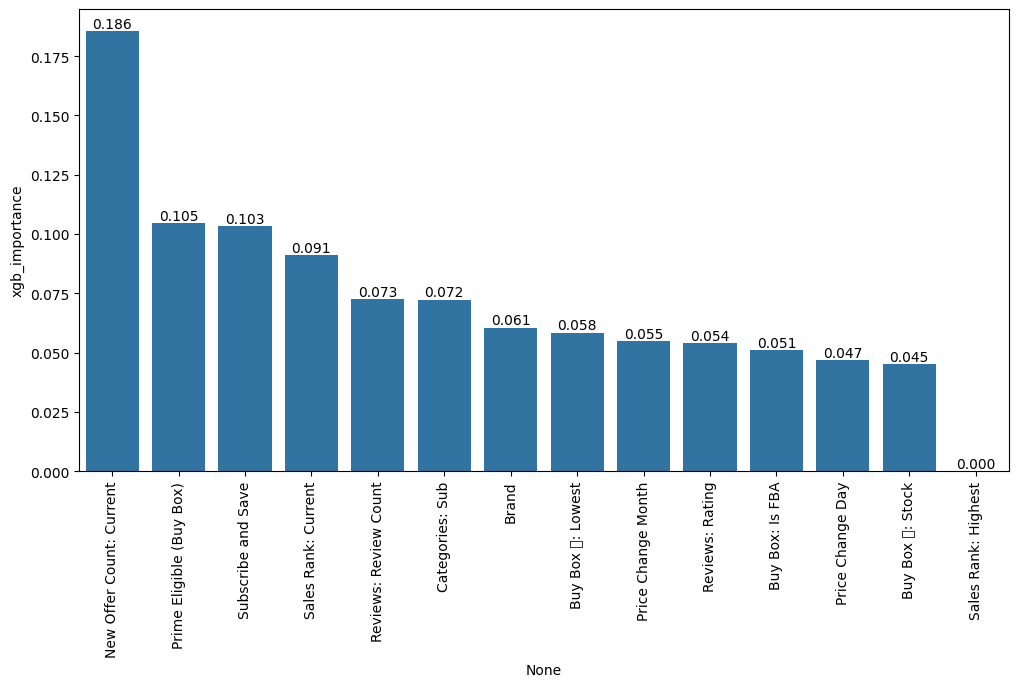

In [397]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

In [398]:
y_pred = xgb_pipe_smote.predict(X_test)
xgb_f1_smote = f1_score(y_test, y_pred)
xgb_accuracy_smote = accuracy_score(y_test, y_pred)

# ADABoost

In [399]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('ada_model', AdaBoostClassifier(random_state=42))]
ada_pipe = Pipeline(steps= operations)

ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('ada_model', AdaBoostClassifier(random_state=42))])

In [400]:
eval_metric(ada_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[37  5]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.58      0.58      0.58        12

    accuracy                           0.81        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.81      0.81      0.81        54


Train_Set
[[367  13]
 [ 27  77]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       380
           1       0.86      0.74      0.79       104

    accuracy                           0.92       484
   macro avg       0.89      0.85      0.87       484
weighted avg       0.92      0.92      0.92       484



## CV

In [401]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=42))]
ada_pipe = Pipeline(steps= operations)

scores = cross_validate(ada_pipe, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.827
train_accuracy    0.921
test_precision    0.639
train_precision   0.859
test_recall       0.472
train_recall      0.756
test_f1           0.529
train_f1          0.804
dtype: float64

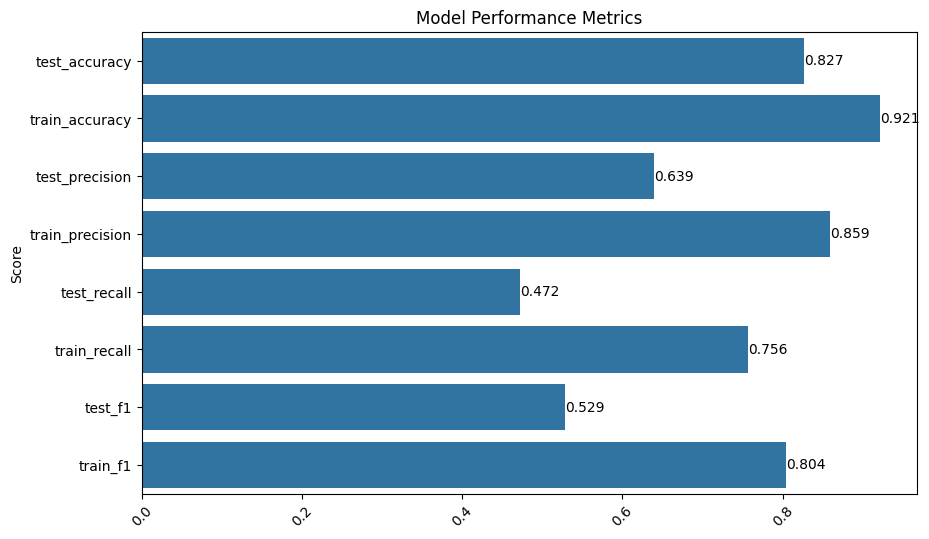

In [402]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

In [403]:
ada_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Prime Eligible (Buy Box)',
                                     'Subscribe and Save']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Categories: Sub', 'Brand'])])),
  ('ada_model', AdaBoostClassifier(random_state=42))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder

## Grid Search

In [404]:
param_grid = {
    "ada_model__n_estimators": [50, 100, 200],
    "ada_model__learning_rate": [0.01, 0.1, 0.5, 1]
}

In [405]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=42))]
ada_pipe = Pipeline(steps= operations)

ada_grid = GridSearchCV(ada_pipe, param_grid, scoring = "f1", n_jobs = -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('ada_model',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ada_model__learning_rate': [0.01, 0.1, 0.5, 1],
                         'ada_model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [406]:
eval_metric(ada_grid, X_train, y_train, X_test, y_test)

Test_Set
[[37  5]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.58      0.58      0.58        12

    accuracy                           0.81        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.81      0.81      0.81        54


Train_Set
[[367  13]
 [ 27  77]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       380
           1       0.86      0.74      0.79       104

    accuracy                           0.92       484
   macro avg       0.89      0.85      0.87       484
weighted avg       0.92      0.92      0.92       484



In [407]:
ada_grid.best_params_

{'ada_model__learning_rate': 1, 'ada_model__n_estimators': 50}

In [408]:
ada_grid.best_score_

0.5616369448627513

In [409]:
operations = [('column_trans',column_trans),
              ('ada_model', AdaBoostClassifier(random_state=42,
                                                n_estimators=50,
                                                learning_rate=1))]

ada_pipe = Pipeline(steps= operations)

ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('ada_model',
                 AdaBoostClassifier(learning_rate=1, random_state=42))])

In [410]:
y_pred = ada_pipe.predict(X_test)
ada_f1 = f1_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)

## Smote

In [411]:
from sklearn.impute import SimpleImputer

# Define column transformers
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('ada_model', AdaBoostClassifier(random_state=42))
]

# Create the pipeline
ada_pipe_smote = Pipeline(steps=operations)

# Fit the model
ada_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('ada_model', AdaBoostClassifier(random_state=42))])

In [412]:
eval_metric(ada_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[35  7]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.53      0.67      0.59        12

    accuracy                           0.80        54
   macro avg       0.72      0.75      0.73        54
weighted avg       0.82      0.80      0.80        54


Train_Set
[[344  36]
 [ 23  81]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       380
           1       0.69      0.78      0.73       104

    accuracy                           0.88       484
   macro avg       0.81      0.84      0.83       484
weighted avg       0.88      0.88      0.88       484



In [413]:

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('ada_model', AdaBoostClassifier(random_state=42))
]

# Create the pipeline
ada_pipe_smote = Pipeline(steps=operations)

scores = cross_validate(ada_pipe_smote, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.818
train_accuracy    0.889
test_precision    0.592
train_precision   0.711
test_recall       0.625
train_recall      0.817
test_f1           0.590
train_f1          0.760
dtype: float64

In [414]:

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('ada_model', AdaBoostClassifier(random_state=42))
]

# Create the pipeline
ada_pipe_smote = Pipeline(steps=operations)

ada_grid = GridSearchCV(ada_pipe_smote, param_grid, scoring = "f1", n_jobs = -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('ada_model',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ada_model__learning_rate': [0.01, 0.1, 0.5, 1],
                         'ada_model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [415]:
eval_metric(ada_grid, X_train, y_train, X_test, y_test)

Test_Set
[[34  8]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.53      0.75      0.62        12

    accuracy                           0.80        54
   macro avg       0.72      0.78      0.74        54
weighted avg       0.83      0.80      0.81        54


Train_Set
[[333  47]
 [ 21  83]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       380
           1       0.64      0.80      0.71       104

    accuracy                           0.86       484
   macro avg       0.79      0.84      0.81       484
weighted avg       0.88      0.86      0.86       484



## Best Score

In [416]:
ada_grid.best_score_

0.5816543406530891

In [417]:
ada_grid.best_params_

{'ada_model__learning_rate': 0.5, 'ada_model__n_estimators': 50}

## Feature Importancy

In [418]:
operations = [('column_trans',column_trans),
              ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
              ('ada_model', AdaBoostClassifier(random_state=42,
                                                n_estimators=200,
                                                learning_rate=0.1))]

ada_pipe_smote = Pipeline(steps= operations)

ada_pipe_smote.fit(X_train, y_train)
ada_pipe_smote['ada_model'].feature_importances_

array([0.005, 0.01 , 0.025, 0.08 , 0.05 , 0.06 , 0.005, 0.02 , 0.085,
       0.455, 0.055, 0.115, 0.015, 0.02 ])

In [419]:
feats = pd.DataFrame(index=X.columns, data= ada_pipe['ada_model'].feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

ada_importance
Prime Eligible (Buy Box)           0.180
Reviews: Review Count              0.140
Buy Box 🚚: Lowest                  0.140
Reviews: Rating                    0.120
Buy Box 🚚: Stock                   0.120
Brand                              0.100
New Offer Count: Current           0.080
Categories: Sub                    0.060
Price Change Day                   0.040
Subscribe and Save                 0.020
Sales Rank: Current                0.000
Sales Rank: Highest                0.000
Buy Box: Is FBA                    0.000
Price Change Month                 0.000

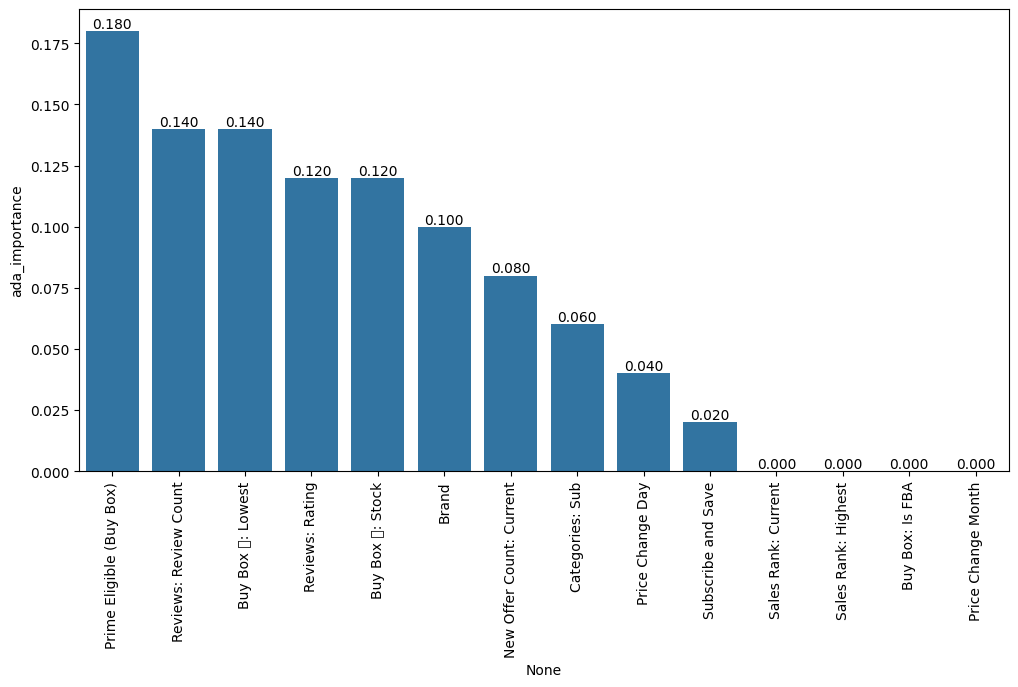

In [420]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

In [421]:
y_pred = ada_pipe_smote.predict(X_test)
ada_f1_smote = f1_score(y_test, y_pred)
ada_accuracy_smote = accuracy_score(y_test, y_pred)

# Gradient Boosting

In [422]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('grad_model', GradientBoostingClassifier(random_state=42))]
grad_pipe = Pipeline(steps= operations)

grad_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('grad_model', GradientBoostingClassifier(random_state=42))])

In [423]:
eval_metric(grad_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[39  3]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.62      0.42      0.50        12

    accuracy                           0.81        54
   macro avg       0.74      0.67      0.69        54
weighted avg       0.80      0.81      0.80        54


Train_Set
[[379   1]
 [  6  98]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       0.99      0.94      0.97       104

    accuracy                           0.99       484
   macro avg       0.99      0.97      0.98       484
weighted avg       0.99      0.99      0.99       484



## CV

In [424]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=42))]
grad_pipe = Pipeline(steps= operations)

scores = cross_validate(grad_pipe, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.853
train_accuracy    0.994
test_precision    0.762
train_precision   0.996
test_recall       0.507
train_recall      0.975
test_f1           0.592
train_f1          0.985
dtype: float64

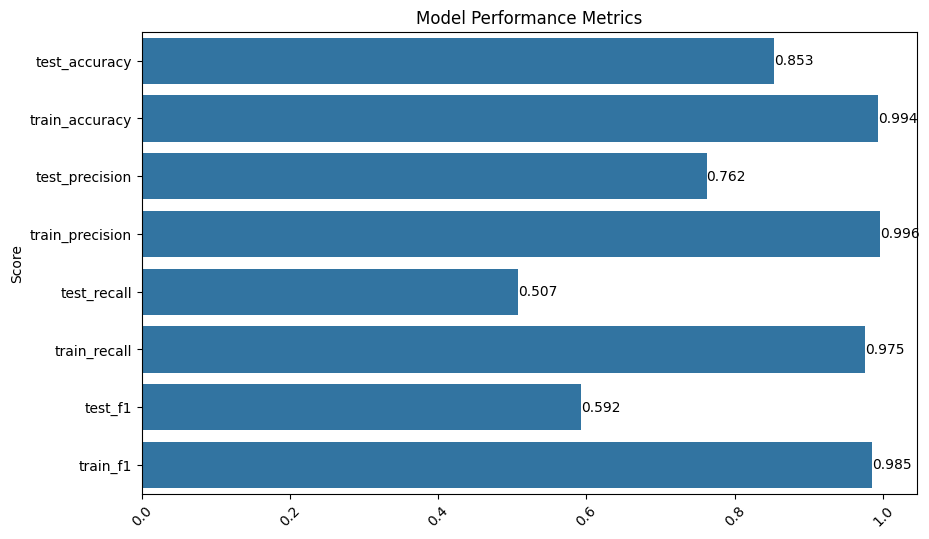

In [425]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

## Grid Search

In [426]:
param_grid = {
    "grad_model__n_estimators": [64, 100, 200],
    "grad_model__subsample": [0.5, 0.8],
    "grad_model__max_features": [None, 2, 3, 4],
    "grad_model__learning_rate": [0.1, 0.5, 1, 10],
    "grad_model__max_depth": [3, 4, 5]
}

In [427]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=101))]
grad_pipe = Pipeline(steps= operations)

grad_grid = GridSearchCV(grad_pipe, param_grid, scoring = "f1", n_jobs = -1)

grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('grad_model',
                                        GradientBoostingClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'grad_model__learning_rate': [0.1, 0.5, 1, 10],
                         'grad_model__max_depth': [3, 4, 5],
                         'grad_model__max_features': [None, 2, 3, 4],
                         'grad_model__n_estimators': [64, 100, 200],
                         'grad_model__subsample': [0.5, 0.8]},
             scoring='f1')

In [428]:
eval_metric(grad_grid, X_train, y_train, X_test, y_test)

Test_Set
[[39  3]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.70      0.58      0.64        12

    accuracy                           0.85        54
   macro avg       0.79      0.76      0.77        54
weighted avg       0.84      0.85      0.85        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [429]:
grad_grid.best_params_

{'grad_model__learning_rate': 0.1,
 'grad_model__max_depth': 3,
 'grad_model__max_features': 4,
 'grad_model__n_estimators': 200,
 'grad_model__subsample': 0.5}

In [430]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(learning_rate=0.5,
                                                                                       n_estimators=200,
                                                                                       max_depth=4,
                                                                                       subsample=0.8,
                                                                                       max_features=None,
                                                                                      random_state=42))]
grad_pipe = Pipeline(steps= operations)


grad_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('grad_model',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=4,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [431]:
y_pred = grad_pipe.predict(X_test)
grad_f1 = f1_score(y_test, y_pred)
grad_accuracy = accuracy_score(y_test, y_pred)

## Smote

In [432]:
from sklearn.impute import SimpleImputer

# Define column transformers
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())

# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('grad_model', GradientBoostingClassifier(random_state=42))
]

# Create the pipeline
grad_pipe_smote = Pipeline(steps=operations)

# Fit the model
grad_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('grad_model', GradientBoostingClassifier(random_state=42))])

In [433]:
eval_metric(grad_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[36  6]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.57      0.67      0.62        12

    accuracy                           0.81        54
   macro avg       0.74      0.76      0.75        54
weighted avg       0.83      0.81      0.82        54


Train_Set
[[373   7]
 [  5  99]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       380
           1       0.93      0.95      0.94       104

    accuracy                           0.98       484
   macro avg       0.96      0.97      0.96       484
weighted avg       0.98      0.98      0.98       484



In [434]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('grad_model', GradientBoostingClassifier(random_state=42))
]

# Create the pipeline
grad_pipe_smote = Pipeline(steps=operations)

grad_grid = GridSearchCV(grad_pipe, param_grid, scoring = "f1", n_jobs = -1)

grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Cat...
                                                                          'Brand'])])),
                                       ('grad_model',
                                        GradientBoostingClassifier(learning_rate=0.5,
                                                                   max_depth=4,
                                                                   n_estimators=200,
                                                                   random_state=42,
                                                                   subsample=0.8))]),
             n_jobs=-1,
             param_grid={'grad_model__learning_rate': [0.1, 0.5, 1, 10],
                         'grad_model__max_depth': [3, 4, 5],
                         'grad_model__max_features': [None, 2, 3, 4],
                         'grad_model__n_estimators': [64, 100, 200],
                         'grad_model__subsample': [0.5, 0.8]},
             scoring='f1')

In [435]:
eval_metric(grad_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  2]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.78      0.58      0.67        12

    accuracy                           0.87        54
   macro avg       0.83      0.77      0.79        54
weighted avg       0.86      0.87      0.86        54


Train_Set
[[380   0]
 [  1 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      0.99      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



## Best Score

In [436]:
grad_grid.best_score_

0.619778508454979

In [437]:
grad_grid.best_params_

{'grad_model__learning_rate': 0.1,
 'grad_model__max_depth': 4,
 'grad_model__max_features': None,
 'grad_model__n_estimators': 64,
 'grad_model__subsample': 0.8}

## Feature Importancy

In [438]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(learning_rate=0.5,
                                                                                       n_estimators=200,
                                                                                       max_depth=4,
                                                                                       subsample=0.8,
                                                                                       max_features=None,
                                                                                      random_state=101))]
grad_pipe_smote = Pipeline(steps= operations)


grad_pipe_smote.fit(X_train, y_train)
grad_pipe_smote['grad_model'].feature_importances_

array([0.01108229, 0.00027417, 0.07527151, 0.10078116, 0.06890386,
       0.07333427, 0.01245568, 0.1045395 , 0.14915444, 0.17203418,
       0.00331896, 0.17054727, 0.02476336, 0.03353935])

In [439]:
feats = pd.DataFrame(index=X.columns, data= grad_pipe['grad_model'].feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending = False)
grad_imp_feats

grad_importance
Prime Eligible (Buy Box)            0.203
New Offer Count: Current            0.148
Brand                               0.128
Reviews: Review Count               0.094
Reviews: Rating                     0.091
Categories: Sub                     0.083
Buy Box 🚚: Lowest                   0.074
Buy Box 🚚: Stock                    0.069
Price Change Month                  0.045
Price Change Day                    0.034
Subscribe and Save                  0.016
Buy Box: Is FBA                     0.014
Sales Rank: Current                 0.000
Sales Rank: Highest                 0.000

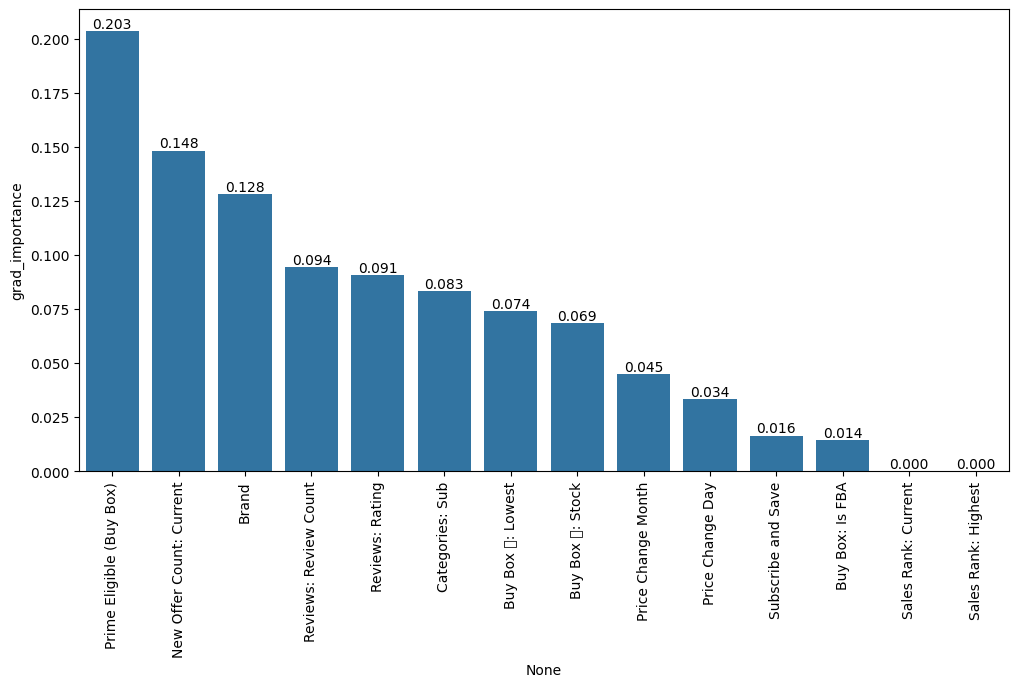

In [440]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

In [441]:
y_pred = grad_pipe_smote.predict(X_test)
grad_f1_smote = f1_score(y_test, y_pred)
grad_accuracy_smote = accuracy_score(y_test, y_pred)

## Light GBM

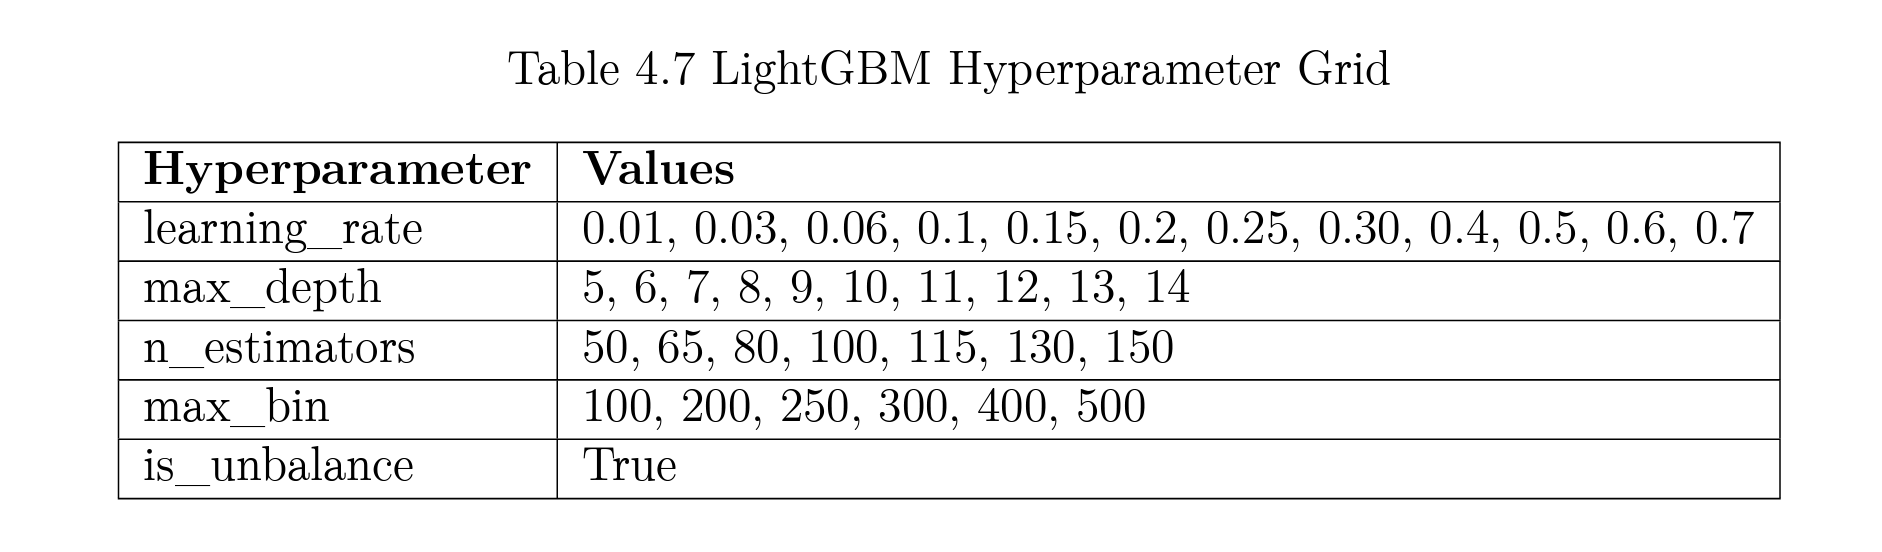

In [442]:
from lightgbm import LGBMClassifier

In [443]:
y_train.unique()

array([0, 1])

In [444]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),
                                        ['Prime Eligible (Buy Box)', 'Subscribe and Save']),

                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                        ['Categories: Sub', 'Brand']),

                                        remainder=StandardScaler())


operations = [('column_trans',column_trans),('lgbm_model', LGBMClassifier(random_state=42))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 104, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214876 -> initscore=-1.295780
[LightGBM] [Info] Start training from score -1.295780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('lgbm_model', LGBMClassifier(random_state=42))])

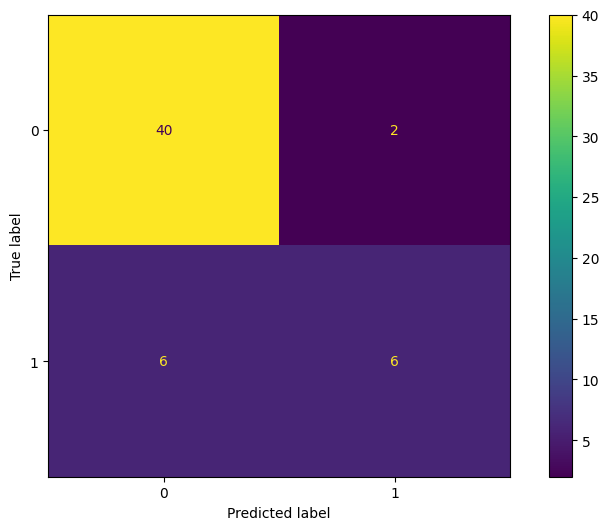

In [445]:
ConfusionMatrixDisplay.from_estimator(lgbm_pipe, X_test, y_test);

In [446]:
eval_metric(lgbm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[40  2]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.75      0.50      0.60        12

    accuracy                           0.85        54
   macro avg       0.81      0.73      0.75        54
weighted avg       0.84      0.85      0.84        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



### Light GBM CV

In [447]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=42))]
lgbm_pipe = Pipeline(steps= operations)

scores = cross_validate(lgbm_pipe, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[LightGBM] [Info] Number of positive: 93, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 435, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.213793 -> initscore=-1.302211
[LightGBM] [Info] Start training from score -1.302211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


test_accuracy     0.860
train_accuracy    1.000
test_precision    0.773
train_precision   1.000
test_recall       0.497
train_recall      1.000
test_f1           0.585
train_f1          1.000
dtype: float64

### Light GBM Grid Search

In [448]:
lgbm_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Prime Eligible (Buy Box)',
                                     'Subscribe and Save']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Categories: Sub', 'Brand'])])),
  ('lgbm_model', LGBMClassifier(random_state=42))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(dr

In [449]:
param_grid = {'lgbm_model__learning_rate': [0.1, 1],
              'lgbm_model__n_estimators': [50, 100, 200],
              'lgbm_model__num_leaves': [20, 30, 50],
              'lgbm_model__max_depth': [-1, 3, 4, 5],
              'lgbm_model__subsample': [0.8, 1.0],
              'lgbm_model__colsample_bytree': [0.8, 1.0]}

In [450]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=42))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_grid = GridSearchCV(lgbm_pipe, param_grid, scoring = "f1", n_jobs = -1)

lgbm_grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 104, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214876 -> initscore=-1.295780
[LightGBM] [Info] Start training from score -1.295780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Prime '
                                                                          'Eligible '
                                                                          '(Buy '
                                                                          'Box)',
                                                                          'Subscribe '
                                                                          'and '
                                                                          'Save']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Categories: '
                                                                          'Sub',
                                                                          'Brand'])])),
                                       ('lgbm_model',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'lgbm_model__colsample_bytree': [0.8, 1.0],
                         'lgbm_model__learning_rate': [0.1, 1],
                         'lgbm_model__max_depth': [-1, 3, 4, 5],
                         'lgbm_model__n_estimators': [50, 100, 200],
                         'lgbm_model__num_leaves': [20, 30, 50],
                         'lgbm_model__subsample': [0.8, 1.0]},
             scoring='f1')

In [451]:
eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[38  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.60      0.50      0.55        12

    accuracy                           0.81        54
   macro avg       0.73      0.70      0.71        54
weighted avg       0.81      0.81      0.81        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



## Smote

In [452]:
# Define the pipeline operations
operations = [
    ('preprocessor', column_trans),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('lgbm_model',  LGBMClassifier(random_state=42))
]

# Create the pipeline
lgbm_pipe_smote = Pipeline(steps=operations)

# Fit the model
lgbm_pipe_smote.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 380, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Prime Eligible (Buy Box)',
                                                   'Subscribe and Save']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Categories: Sub',
                                                   'Brand'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('lgbm_model', LGBMClassifier(random_state=42))])

In [453]:
eval_metric(lgbm_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[37  5]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.55      0.50      0.52        12

    accuracy                           0.80        54
   macro avg       0.70      0.69      0.70        54
weighted avg       0.79      0.80      0.79        54


Train_Set
[[380   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       104

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [454]:
lgbm_grid.best_params_

{'lgbm_model__colsample_bytree': 1.0,
 'lgbm_model__learning_rate': 1,
 'lgbm_model__max_depth': 5,
 'lgbm_model__n_estimators': 200,
 'lgbm_model__num_leaves': 20,
 'lgbm_model__subsample': 0.8}

### Light GBM Best Score

In [455]:
lgbm_grid.best_score_

0.6517962429727134

### Light GBM Feature Importancies

In [456]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=42,
                                                                           colsample_bytree =1.0,
                                                                           learning_rate=1,
                                                                            max_depth=5,
                                                                            n_estimators=200,
                                                                            subsample=0.8,
                                                                            num_leaves=20))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_pipe .fit(X_train, y_train)
lgbm_pipe['lgbm_model'].feature_importances_

[LightGBM] [Info] Number of positive: 104, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214876 -> initscore=-1.295780
[LightGBM] [Info] Start training from score -1.295780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

array([  4,   0,  90,  91,  93, 113,  36,  75, 120,  80,   7,  49,  20,
        35], dtype=int32)

In [457]:
feats = pd.DataFrame(index=X.columns, data= lgbm_pipe ['lgbm_model'].feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance", ascending = False)
lgbm_imp_feats

lgbm_importance
Brand                                 120
Buy Box 🚚: Stock                      113
Buy Box 🚚: Lowest                      93
Reviews: Review Count                  91
Reviews: Rating                        90
Prime Eligible (Buy Box)               80
Categories: Sub                        75
New Offer Count: Current               49
Buy Box: Is FBA                        36
Price Change Day                       35
Price Change Month                     20
Subscribe and Save                      7
Sales Rank: Current                     4
Sales Rank: Highest                     0

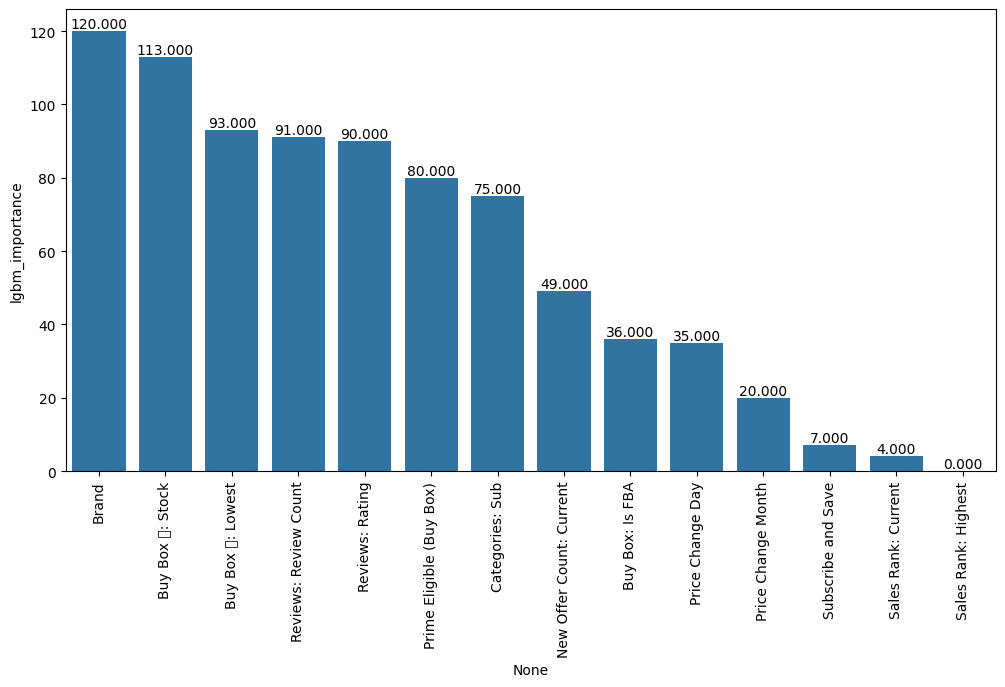

In [458]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

In [459]:
y_pred = lgbm_pipe.predict(X_test)
lgbm_f1 = f1_score(y_test, y_pred)
lgbm_accuracy = accuracy_score(y_test, y_pred)

In [460]:
y_pred = lgbm_pipe_smote.predict(X_test)
lgbm_f1_smote = f1_score(y_test, y_pred)
lgbm_accuracy_smote = accuracy_score(y_test, y_pred)

## Comparing Models

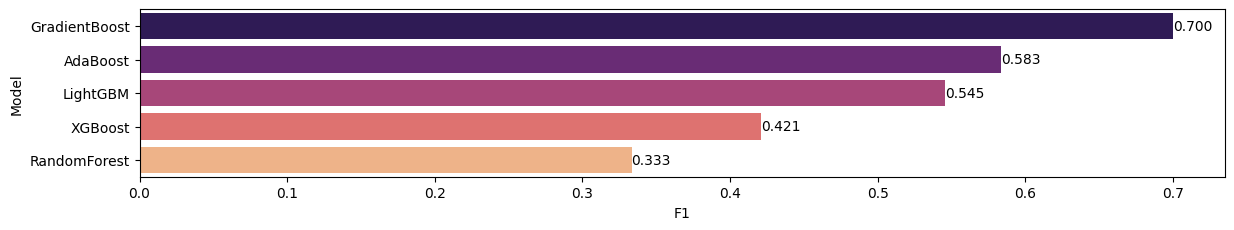

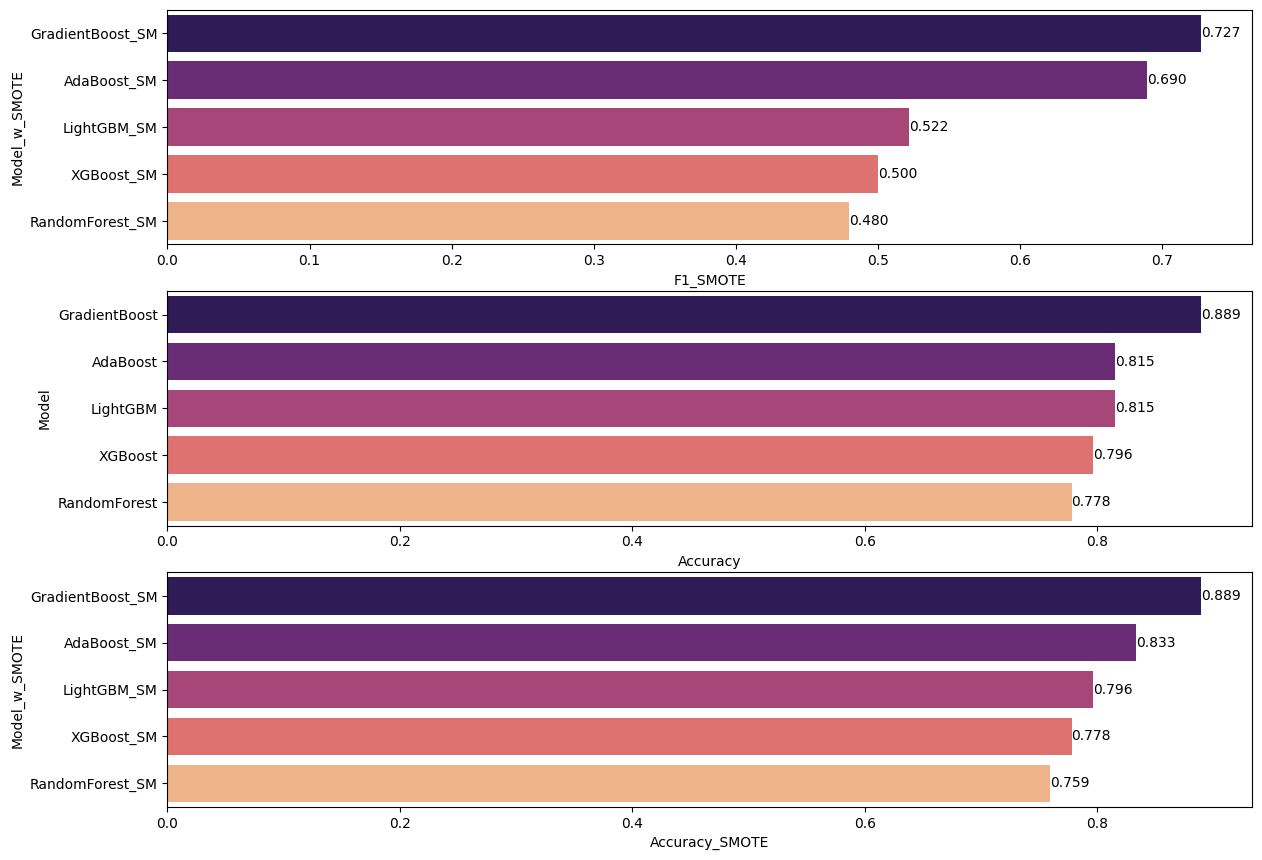

In [461]:
compare = pd.DataFrame({"Model": ["RandomForest", "AdaBoost", "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [RF_f1, ada_f1, grad_f1, xgb_f1,lgbm_f1],
                        "Accuracy": [RF_accuracy, ada_accuracy, grad_accuracy, xgb_accuracy, lgbm_accuracy],
                        "Model_w_SMOTE":["RandomForest_SM", "AdaBoost_SM", "GradientBoost_SM", "XGBoost_SM", "LightGBM_SM"],
                        "F1_SMOTE": [RF_f1_smote, ada_f1_smote, grad_f1_smote, xgb_f1_smote,lgbm_f1_smote],
                        "Accuracy_SMOTE": [RF_accuracy_smote, ada_accuracy_smote, grad_accuracy_smote, xgb_accuracy_smote, lgbm_accuracy_smote]})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)


plt.figure(figsize=(14,14))
plt.subplot(412)
compare = compare.sort_values(by="F1_SMOTE", ascending=False)
ax=sns.barplot(x="F1_SMOTE", y="Model_w_SMOTE", data=compare, palette="magma")
labels(ax)


plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="magma")
labels(ax)


plt.subplot(414)
compare = compare.sort_values(by="Accuracy_SMOTE", ascending=False)
ax=sns.barplot(x="Accuracy_SMOTE", y="Model_w_SMOTE", data=compare, palette="magma")
labels(ax)

plt.show()

In [462]:
compare

Model    F1  Accuracy     Model_w_SMOTE  F1_SMOTE  Accuracy_SMOTE
2  GradientBoost 0.700     0.889  GradientBoost_SM     0.727           0.889
1       AdaBoost 0.583     0.815       AdaBoost_SM     0.690           0.833
4       LightGBM 0.545     0.815       LightGBM_SM     0.522           0.796
3        XGBoost 0.421     0.796        XGBoost_SM     0.500           0.778
0   RandomForest 0.333     0.778   RandomForest_SM     0.480           0.759